In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [79]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [80]:
#Gestion des valeurs manquantes 
train.isna().mean()
#Pas de valeurs manquantes

id               0.0
N_Days           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
Status           0.0
dtype: float64

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


#Traitement des variables binaires
object_columns = train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in object_columns:
    train[col] = label_encoder.fit_transform(train[col])

In [82]:
#Pas de normalisation car utilisation d'XGBoost

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


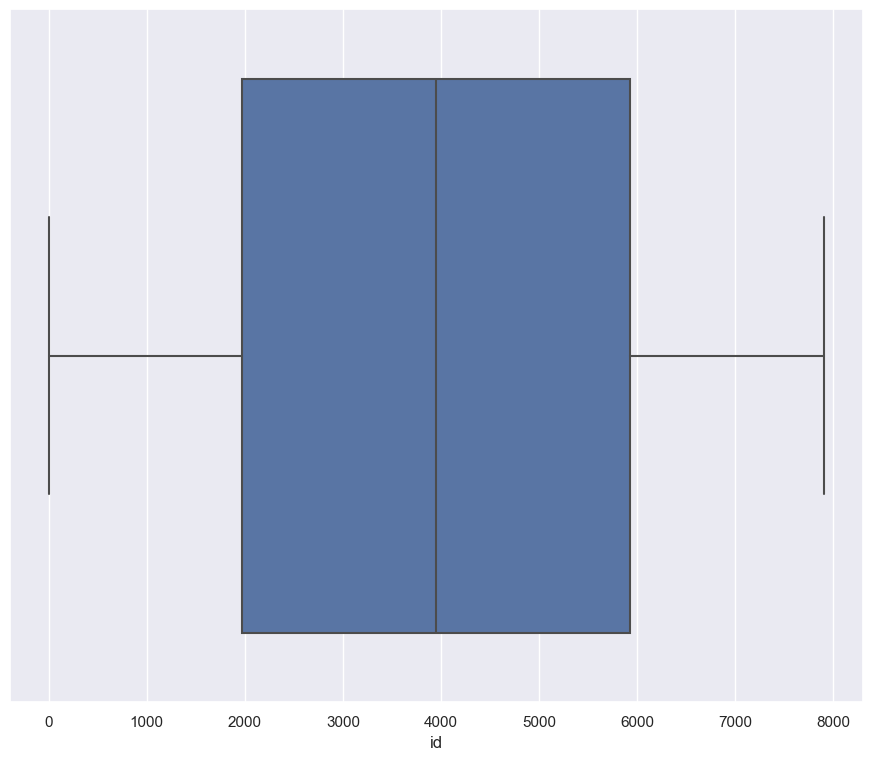

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


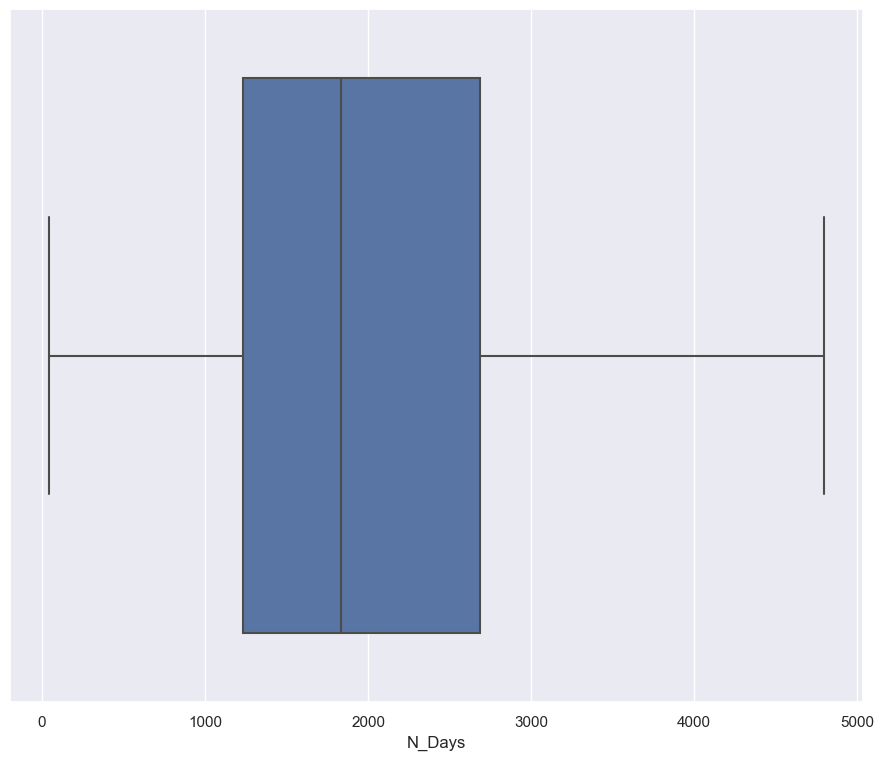

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


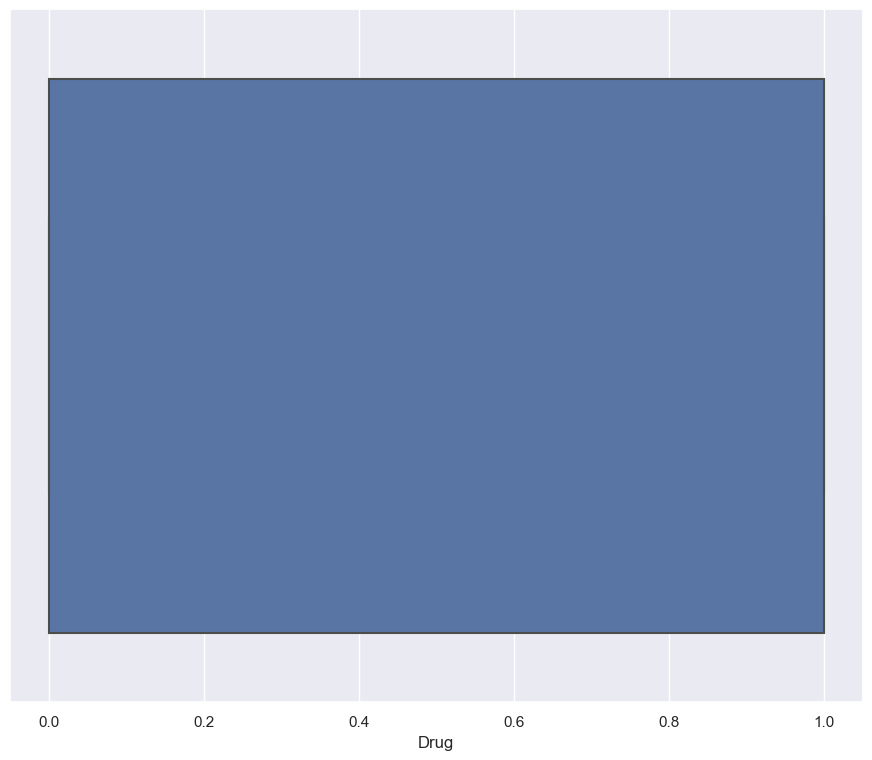

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


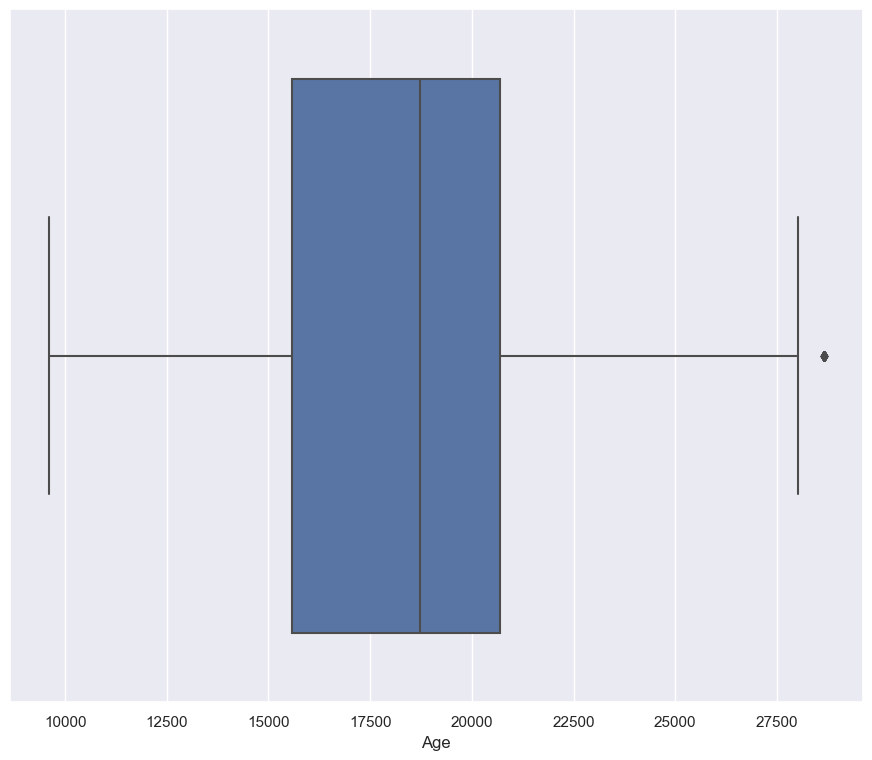

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


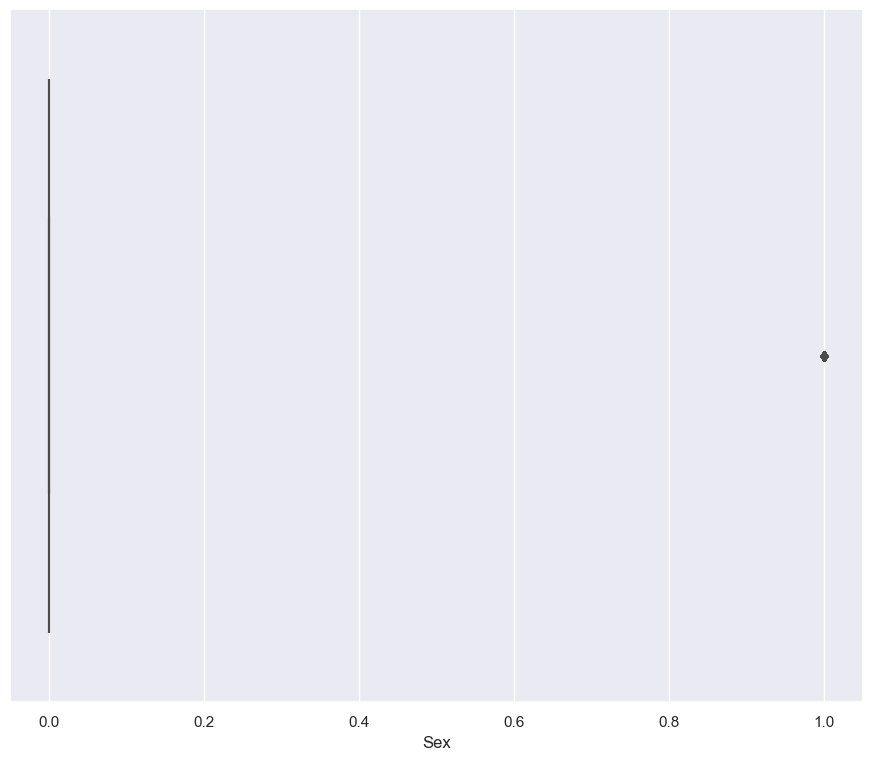

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


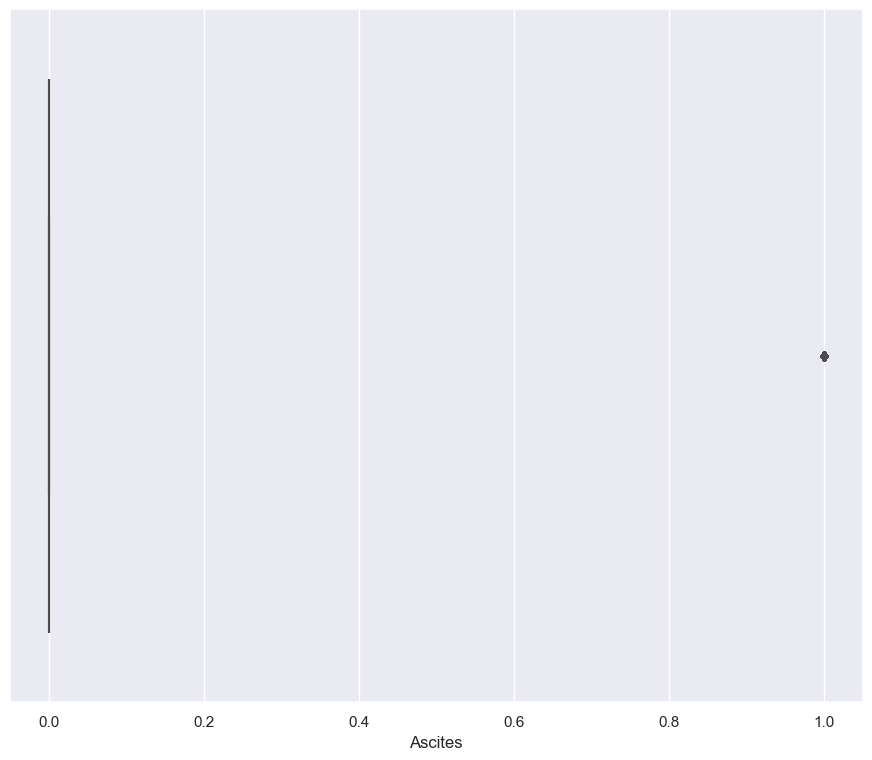

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


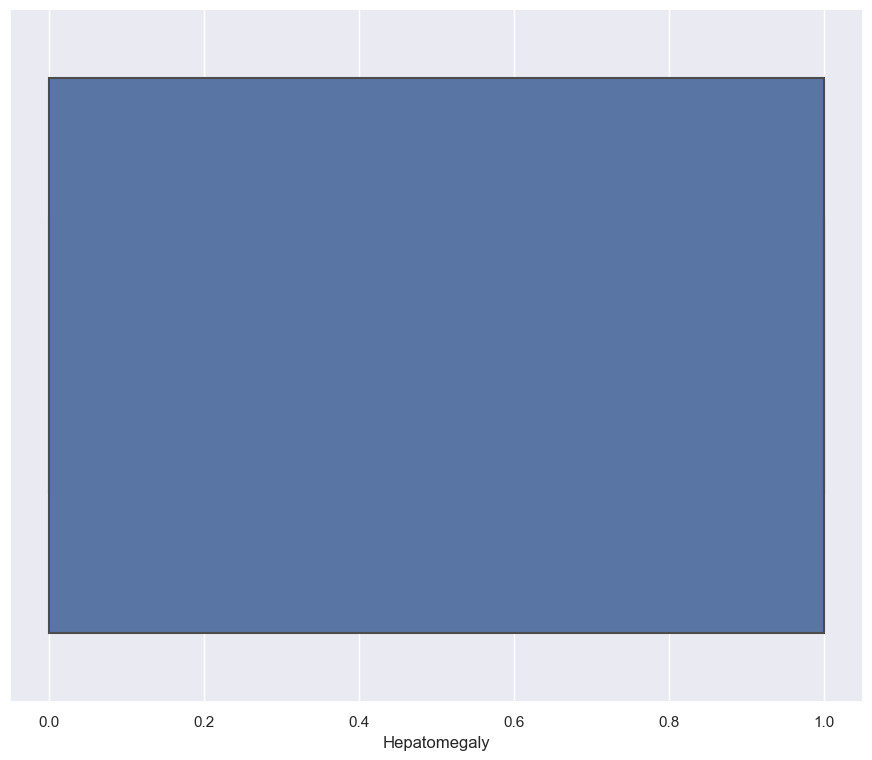

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


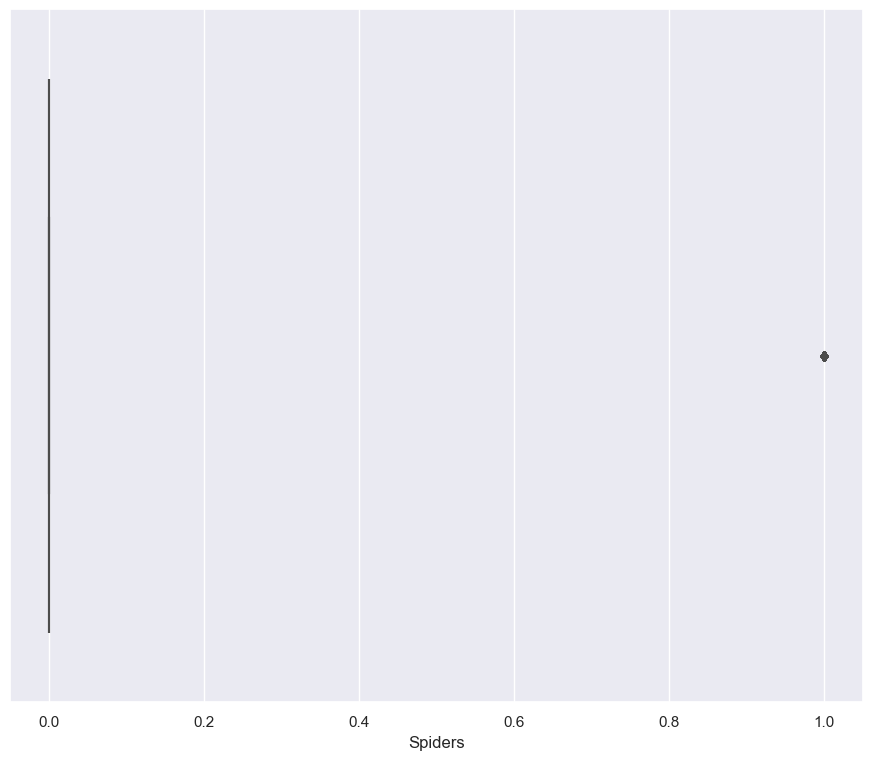

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


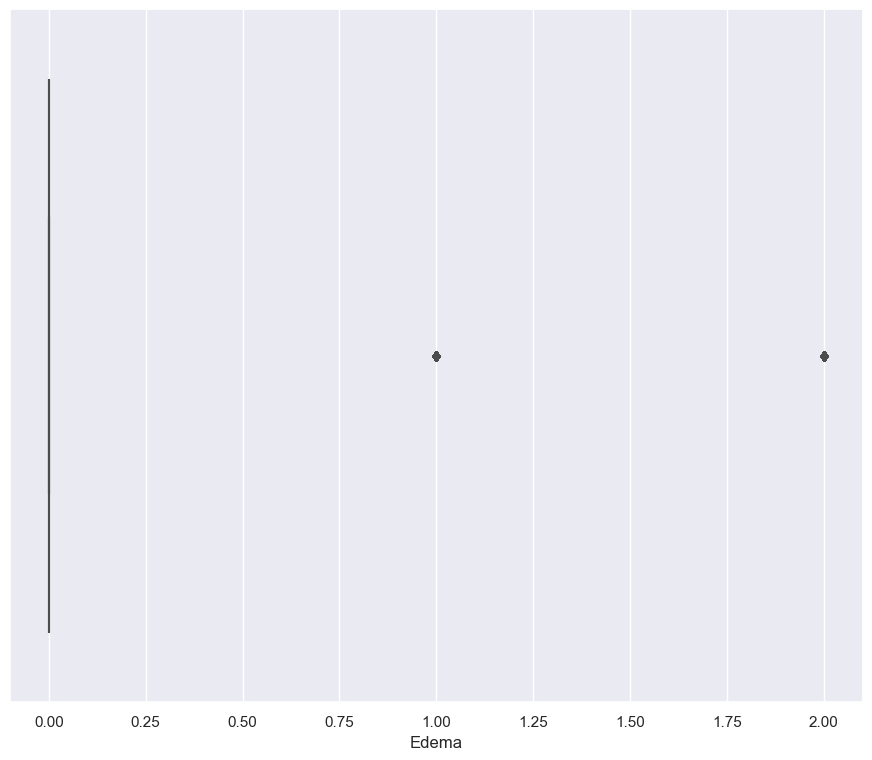

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


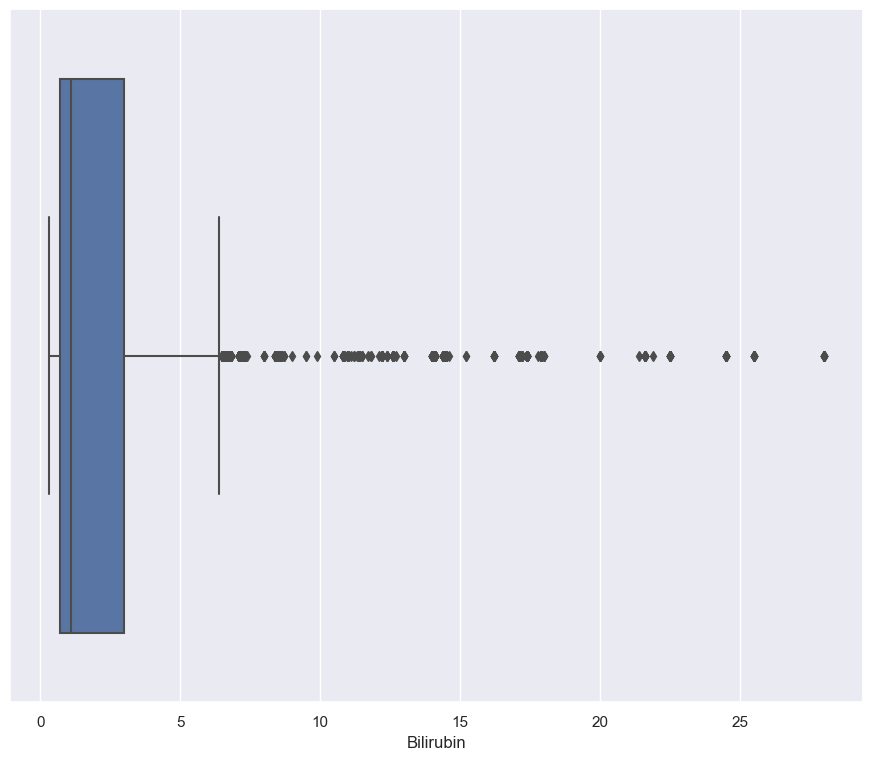

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


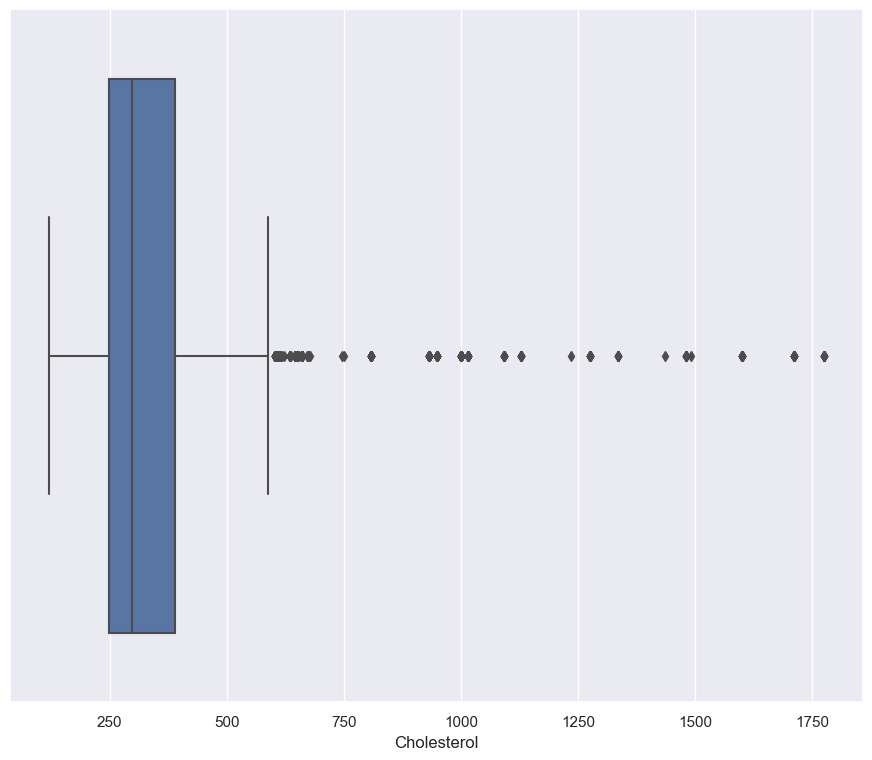

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


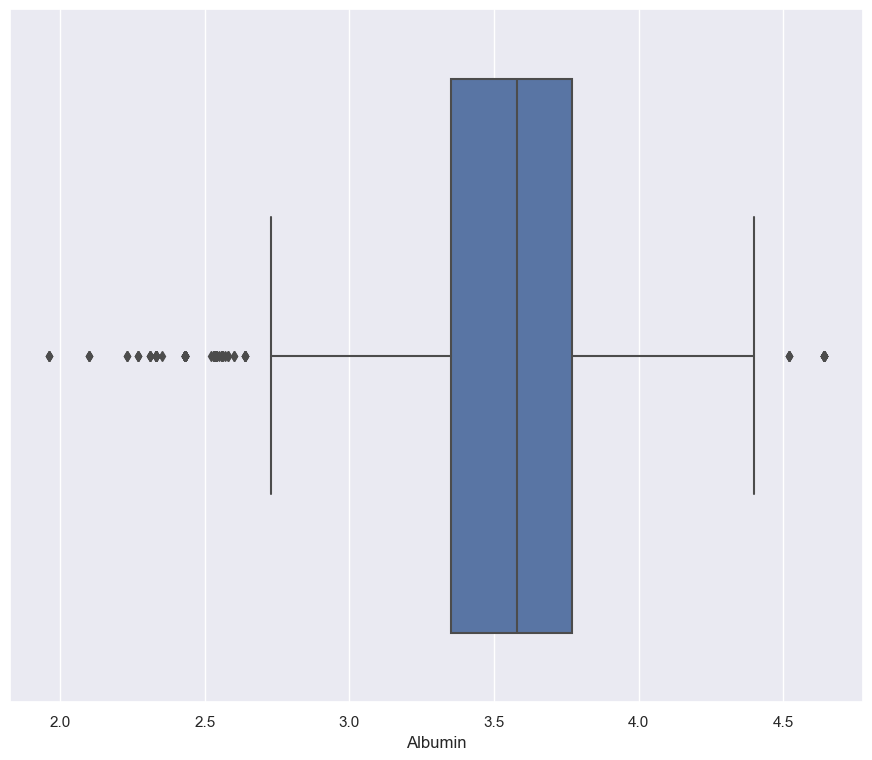

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


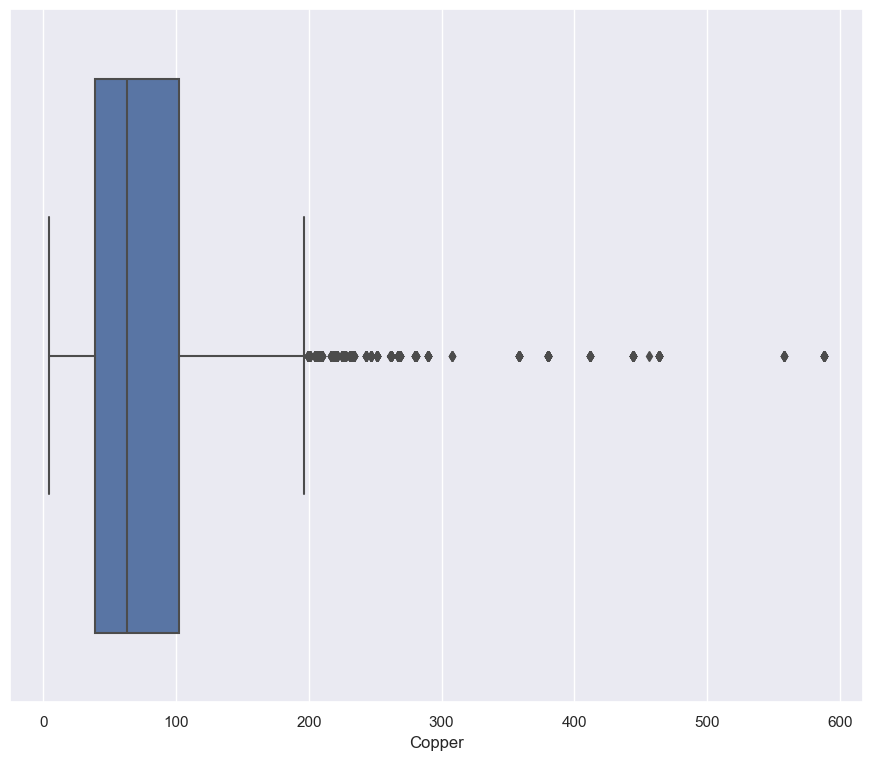

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


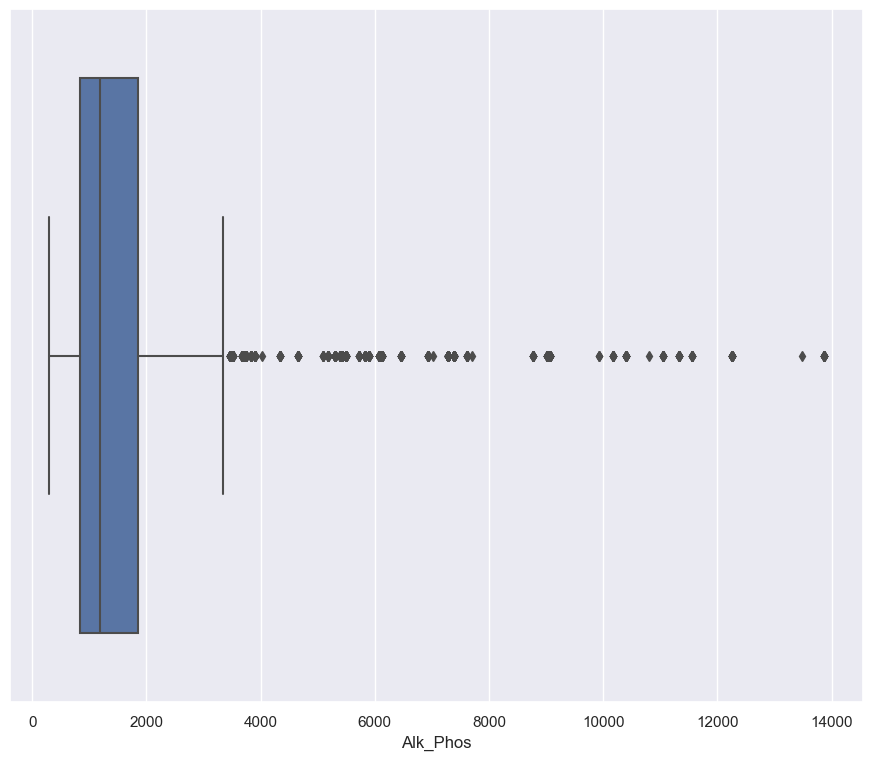

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


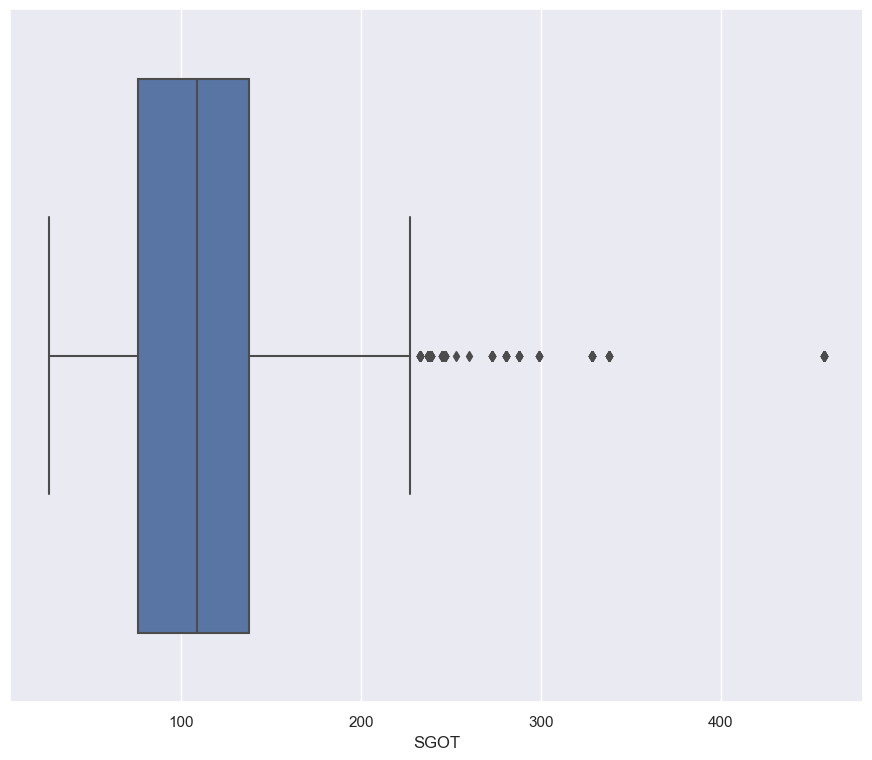

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


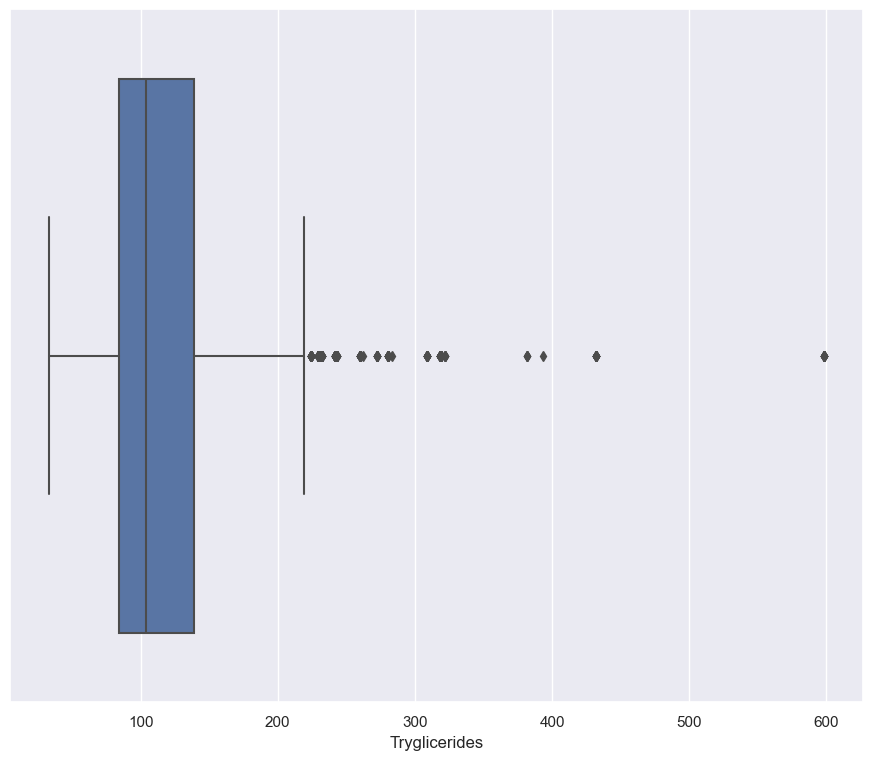

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


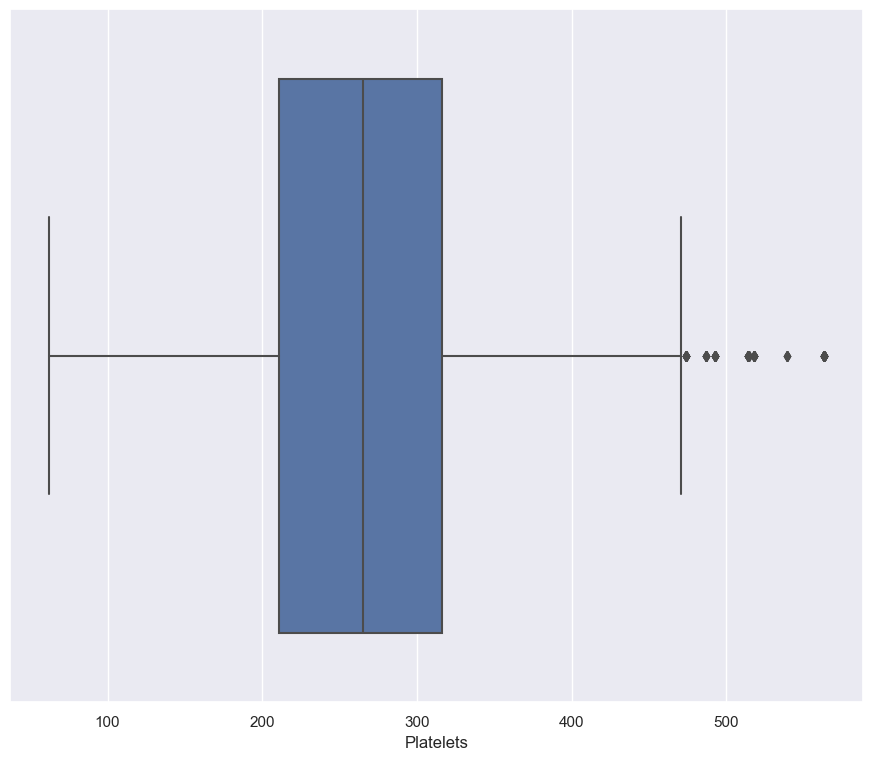

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


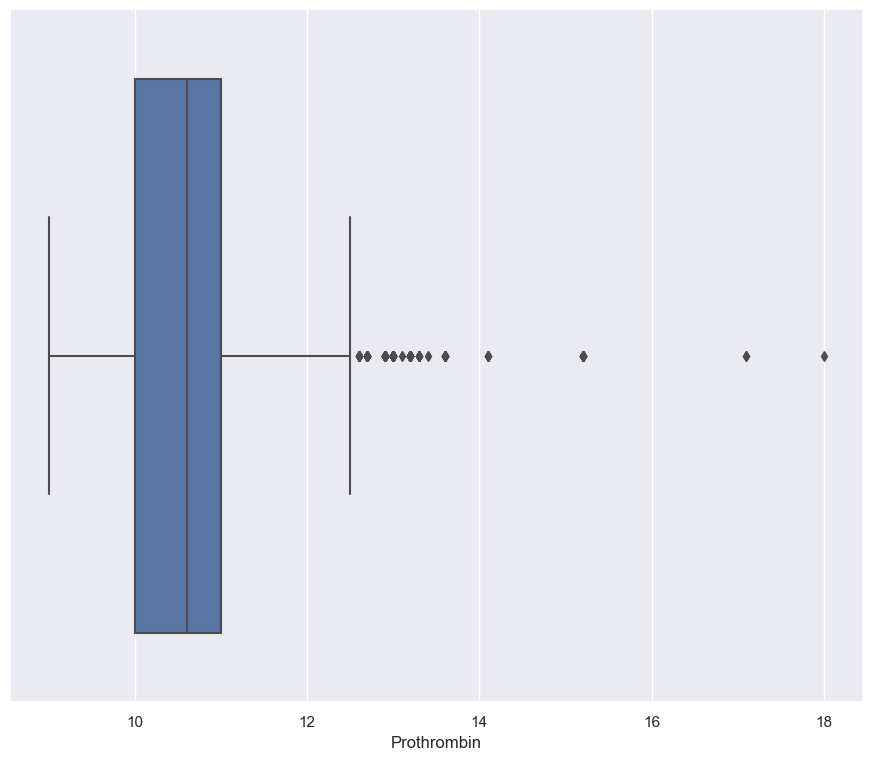

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


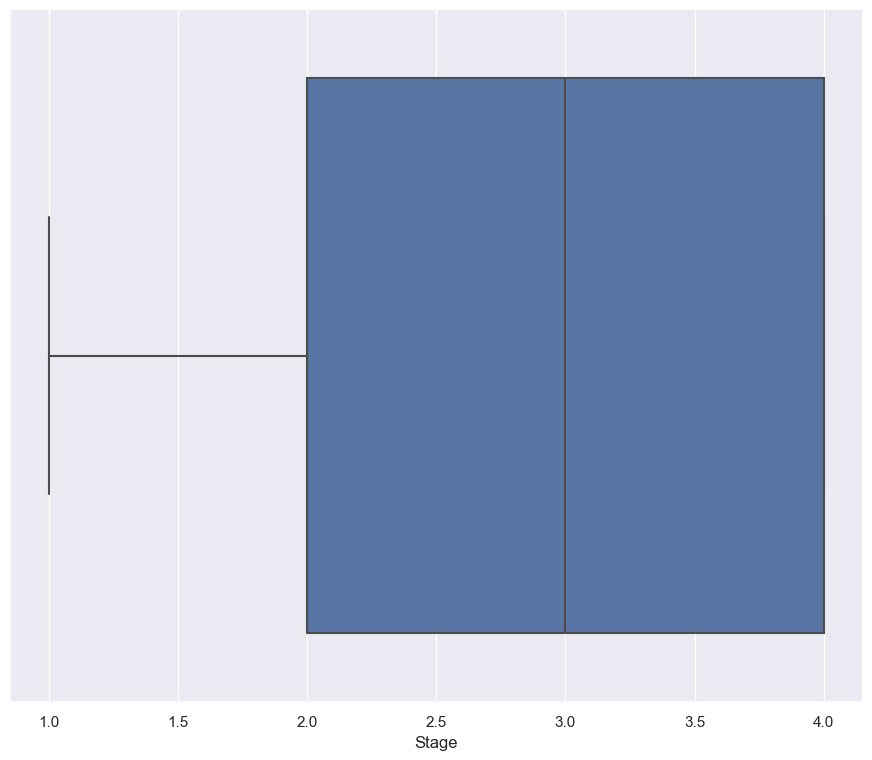

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


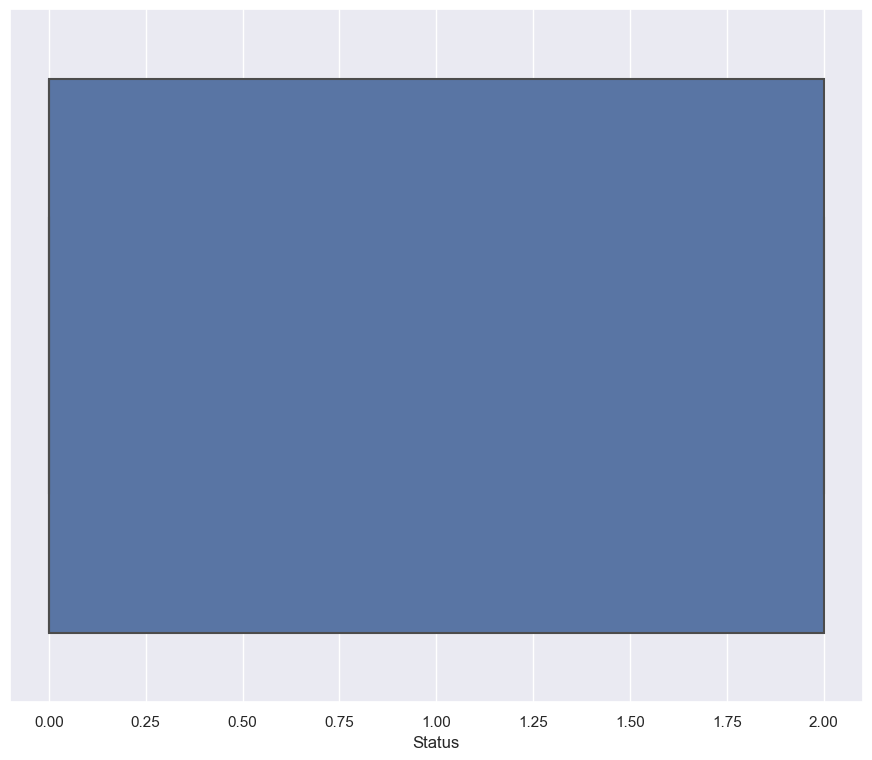

In [83]:
#Valeurs abérrantes - Z Score / Interquartile range / Median absolute deviantion

for i in train.columns:
    plt.figure()
    sns.boxplot(x=train[i])
    plt.show()


# Analyse exploratoire

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Status', ylabel='count'>

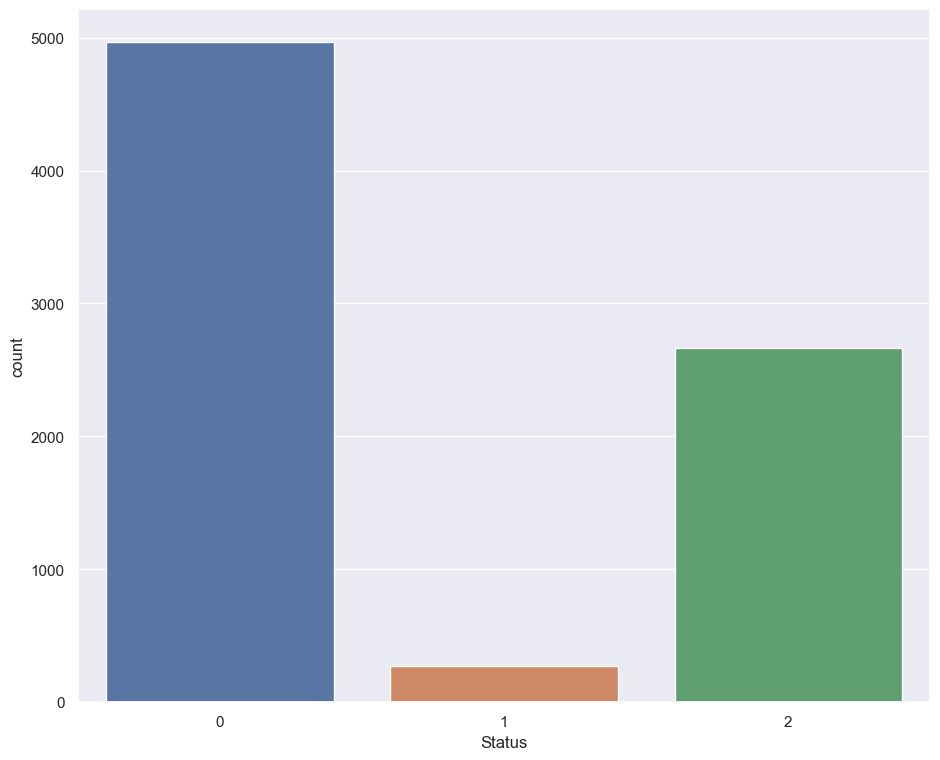

In [85]:
sns.countplot(x = 'Status', data = train)
#Distribution non équilibrée des groupes 
#Il faudra oversample/undersample Status 1 et 2

In [86]:
train['Status'].value_counts()

Status
0    4965
2    2665
1     275
Name: count, dtype: int64

<Axes: >

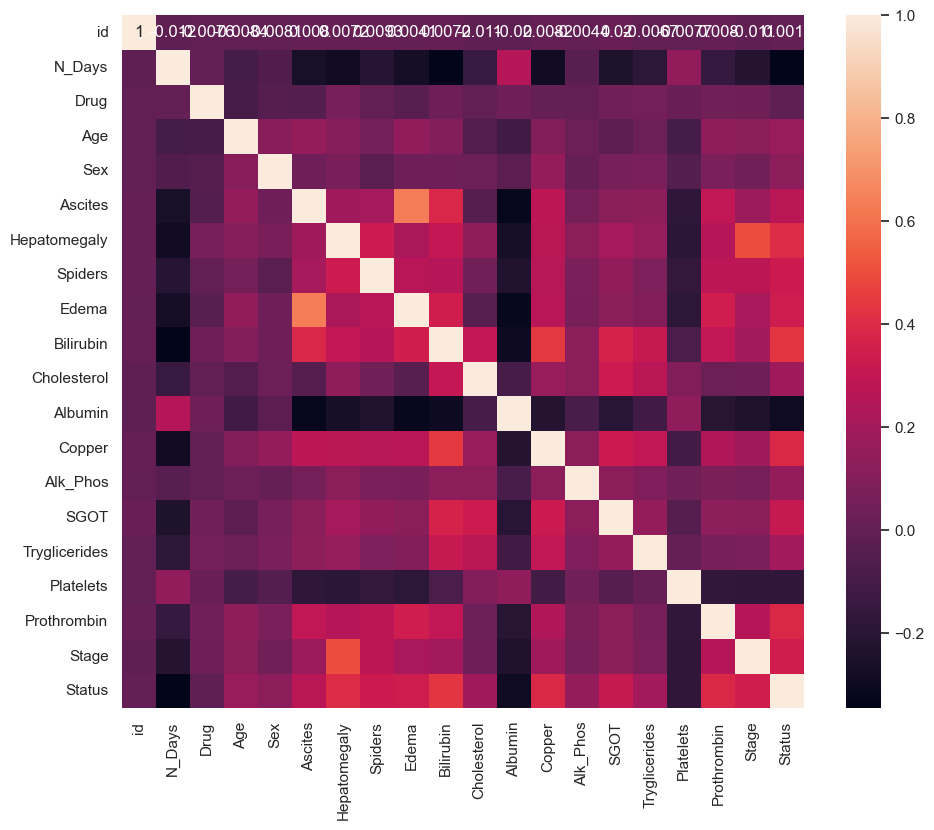

In [87]:
sns.set(rc = {'figure.figsize':(11,9)})
Correlations = train.select_dtypes(include=['number']).corr()
sns.heatmap(Correlations, annot=True)

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


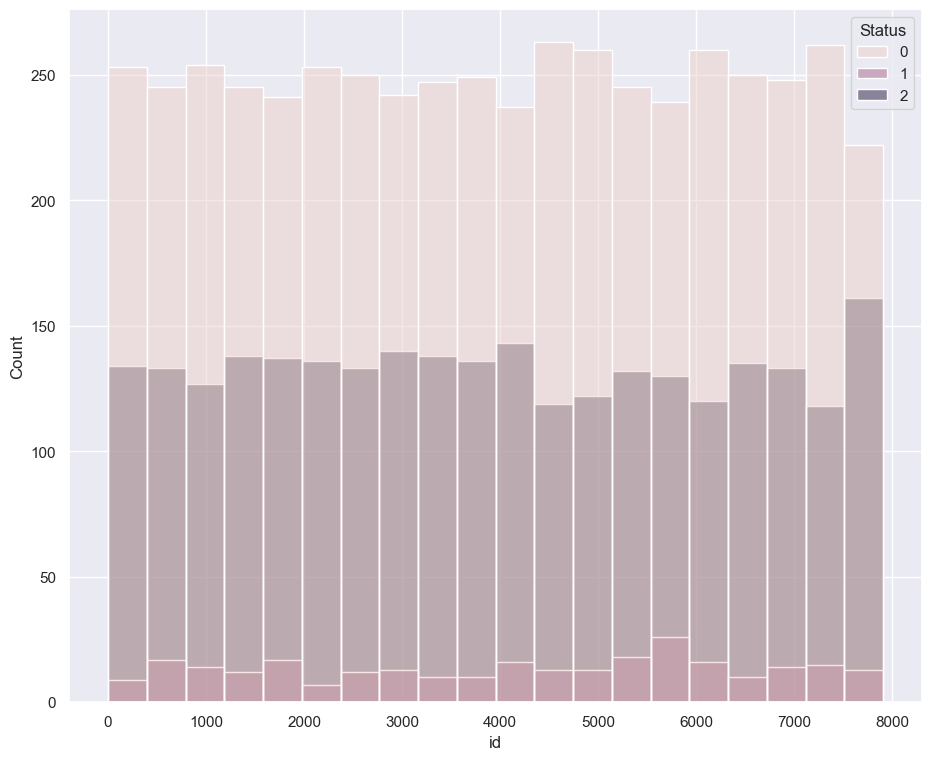

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


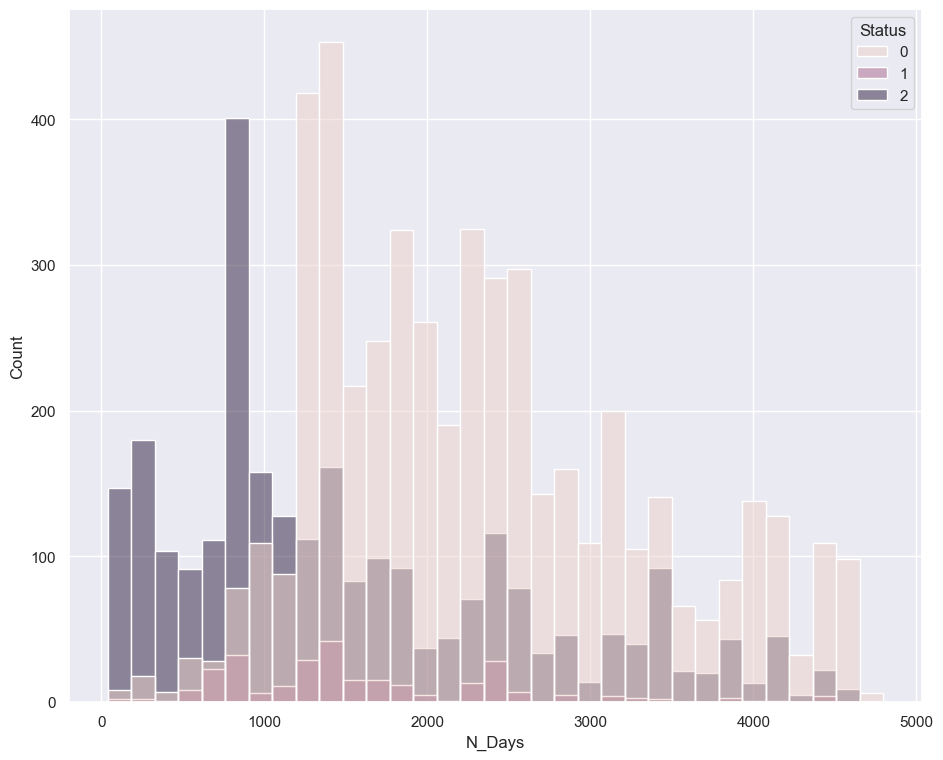

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


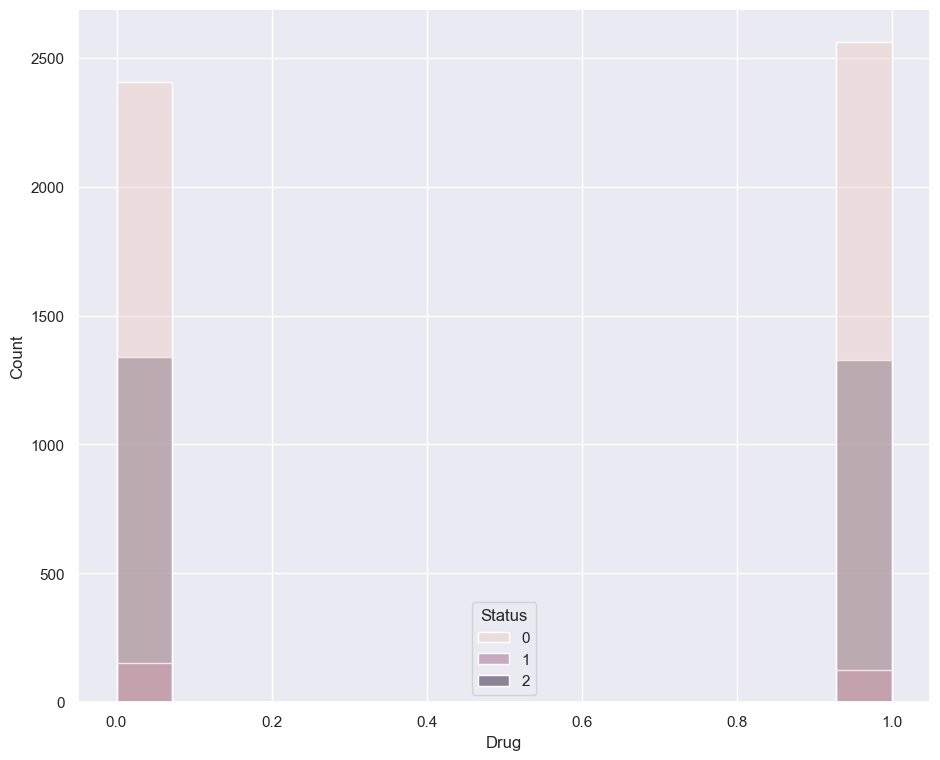

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


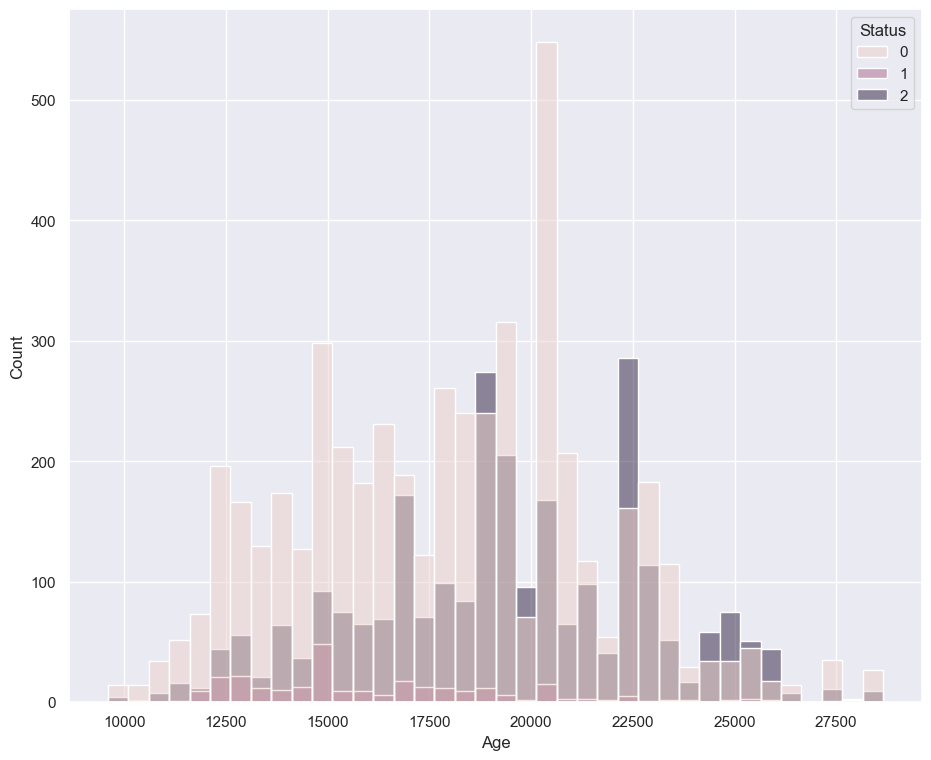

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


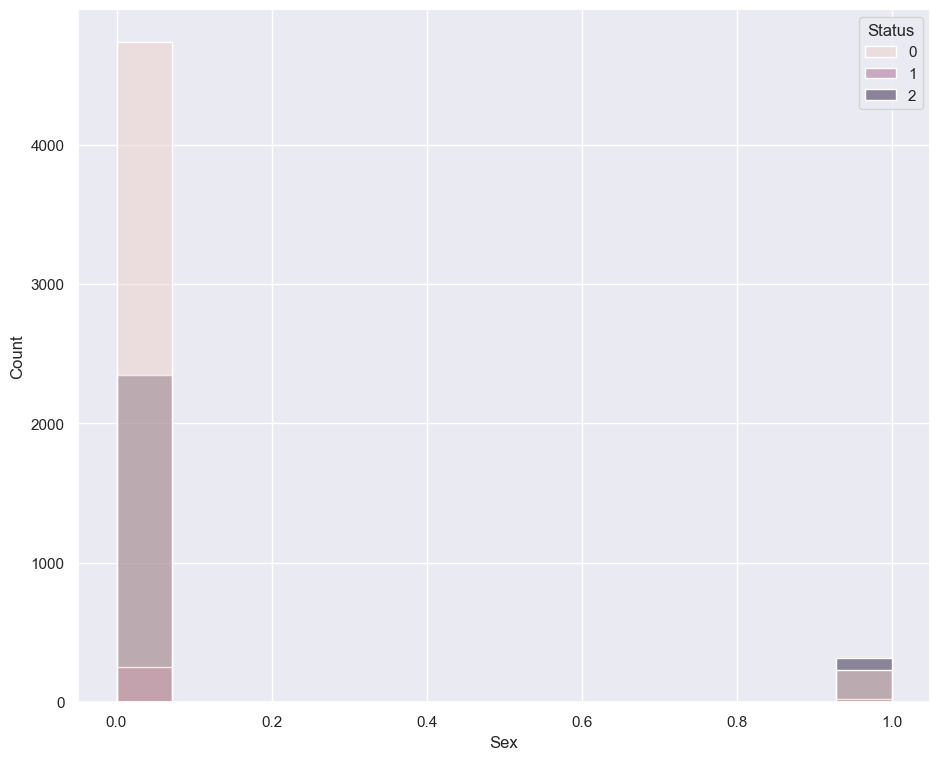

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


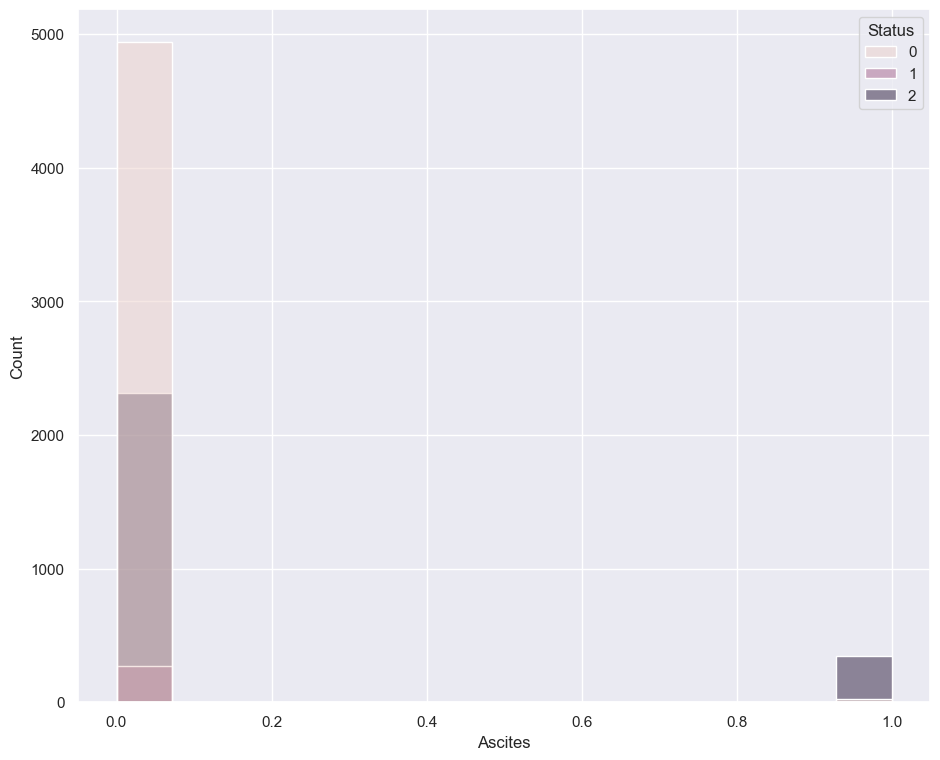

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


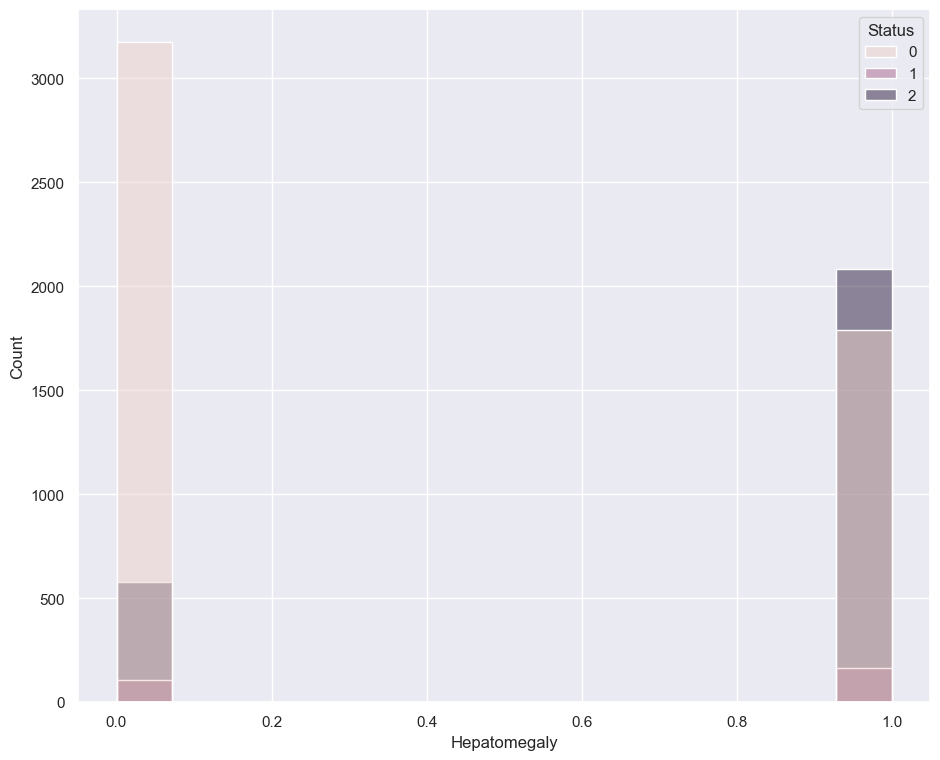

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


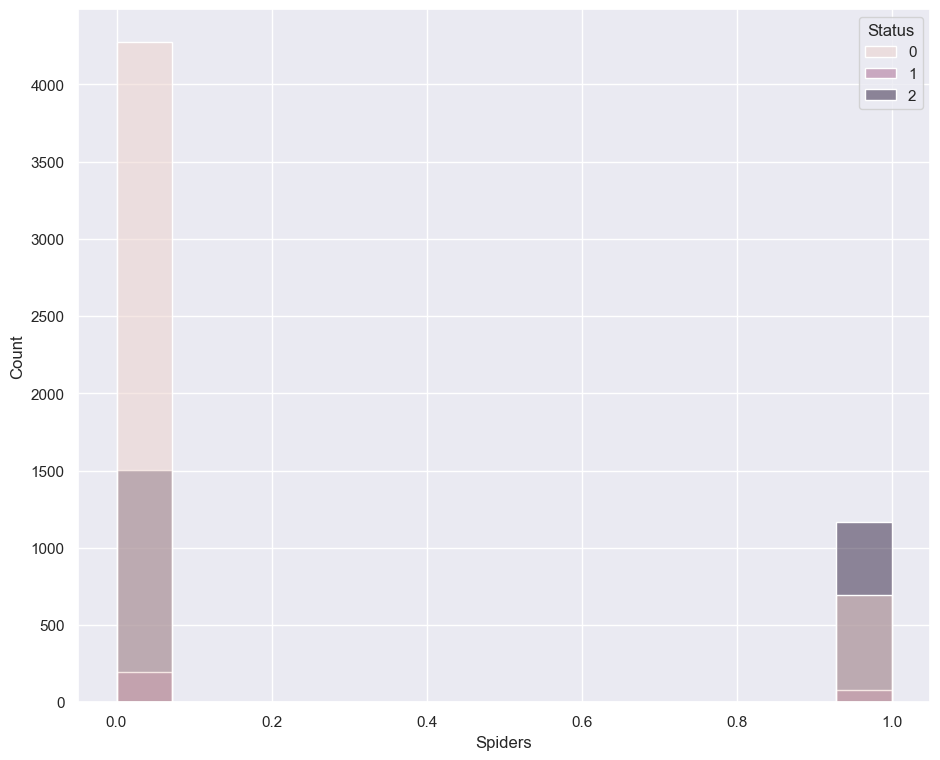

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


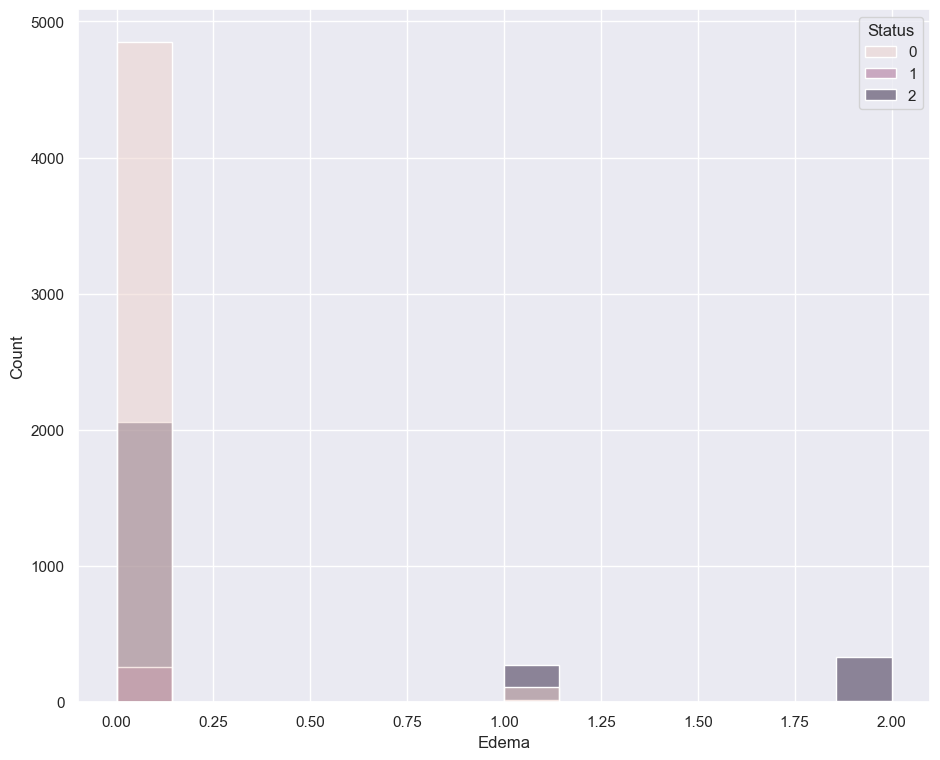

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


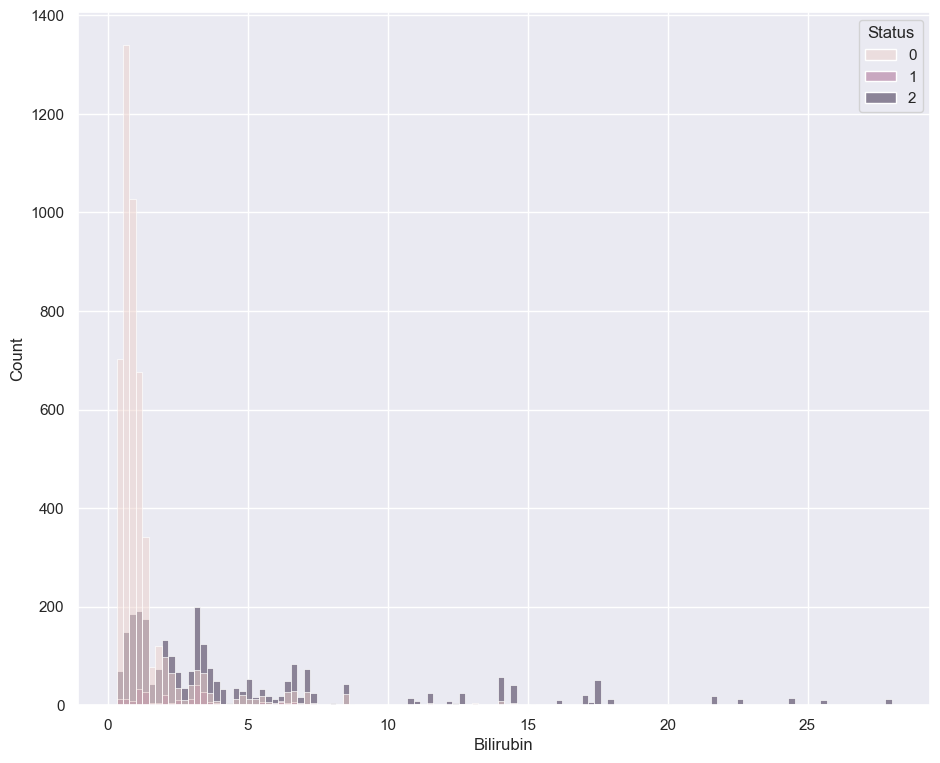

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


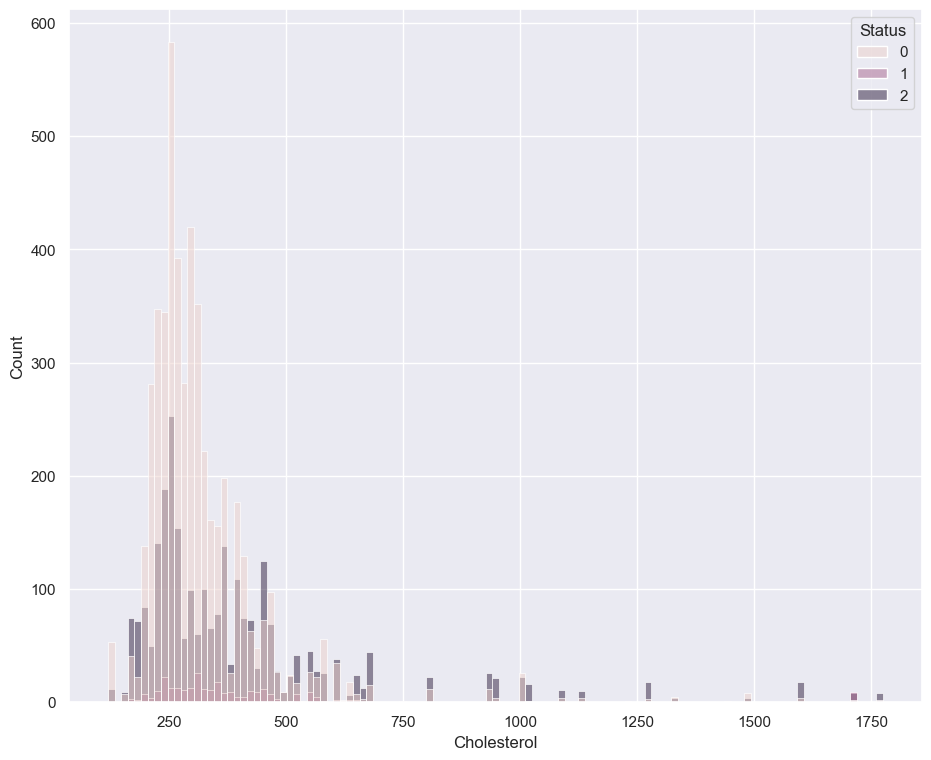

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


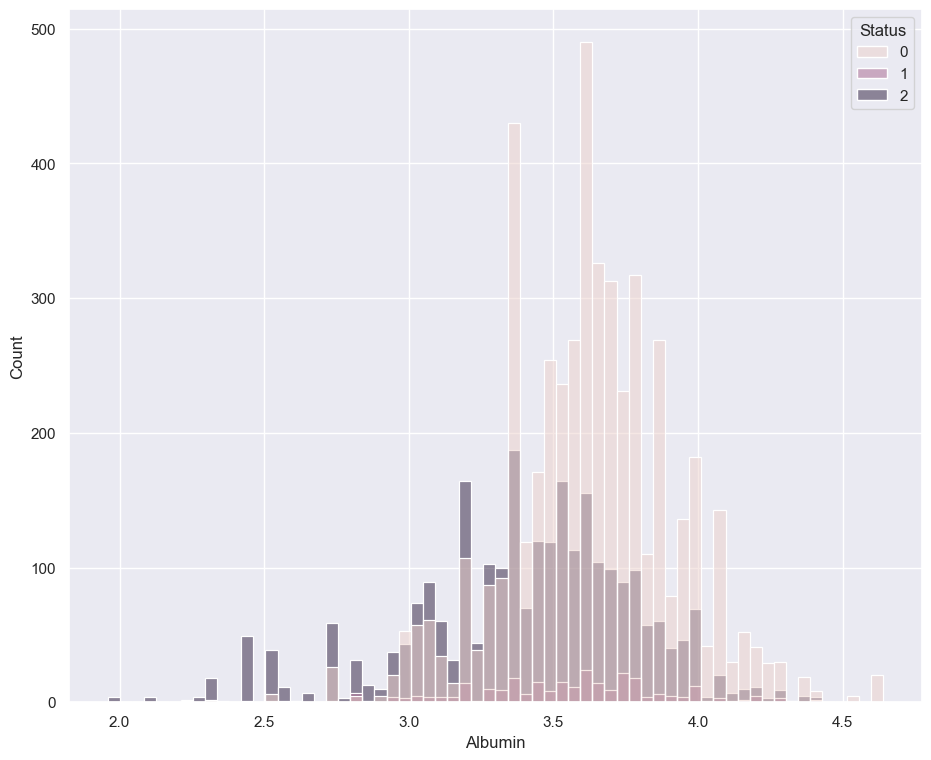

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


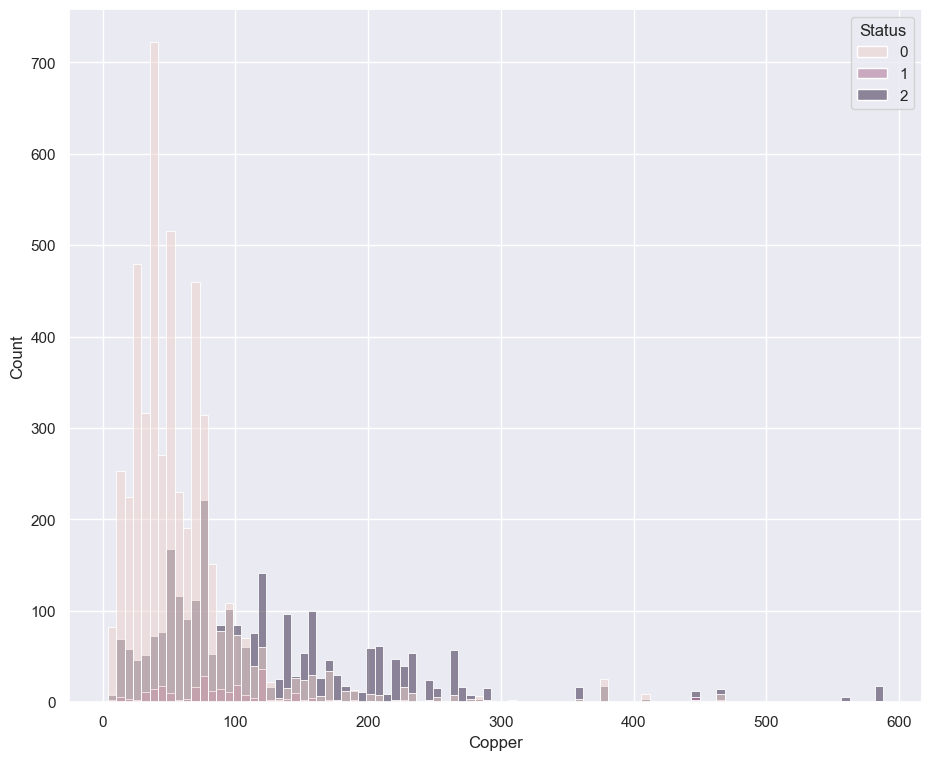

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


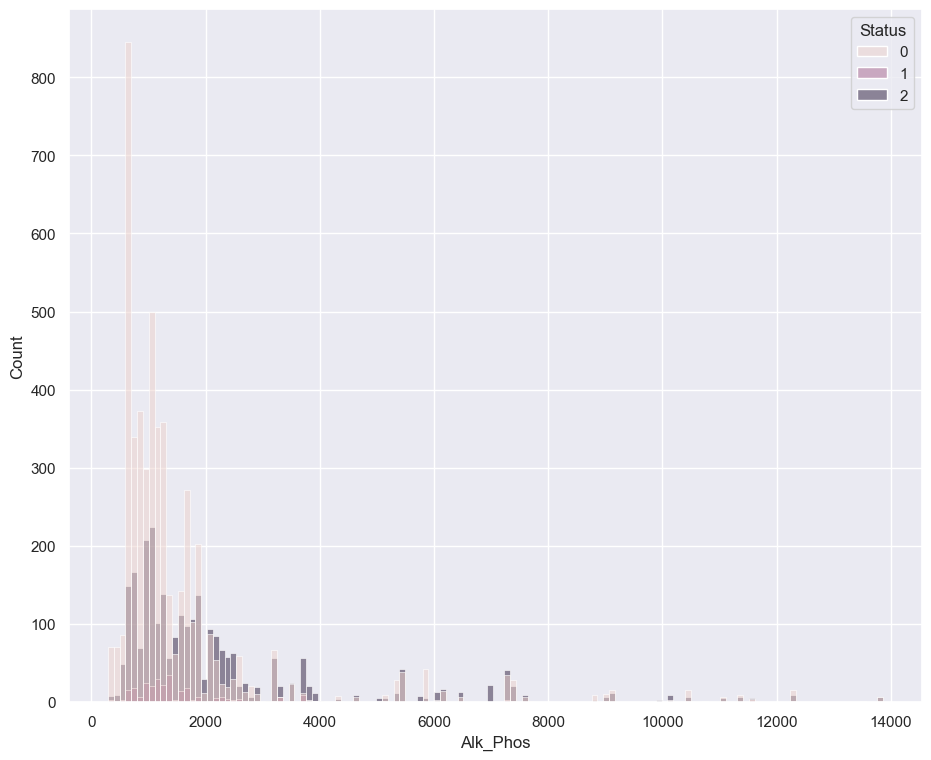

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


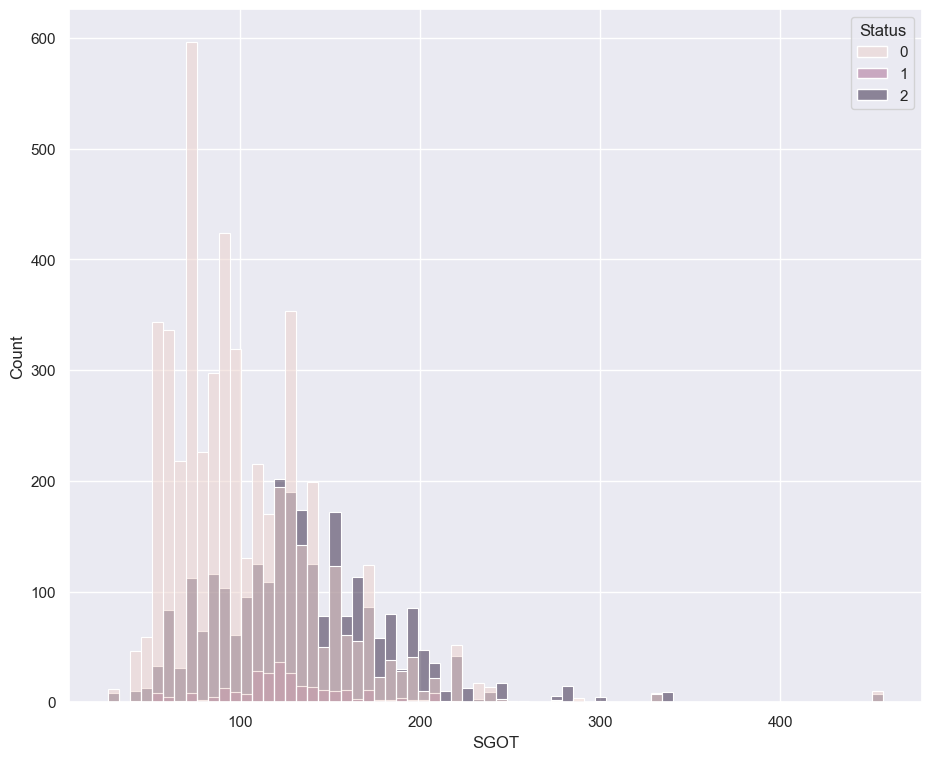

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


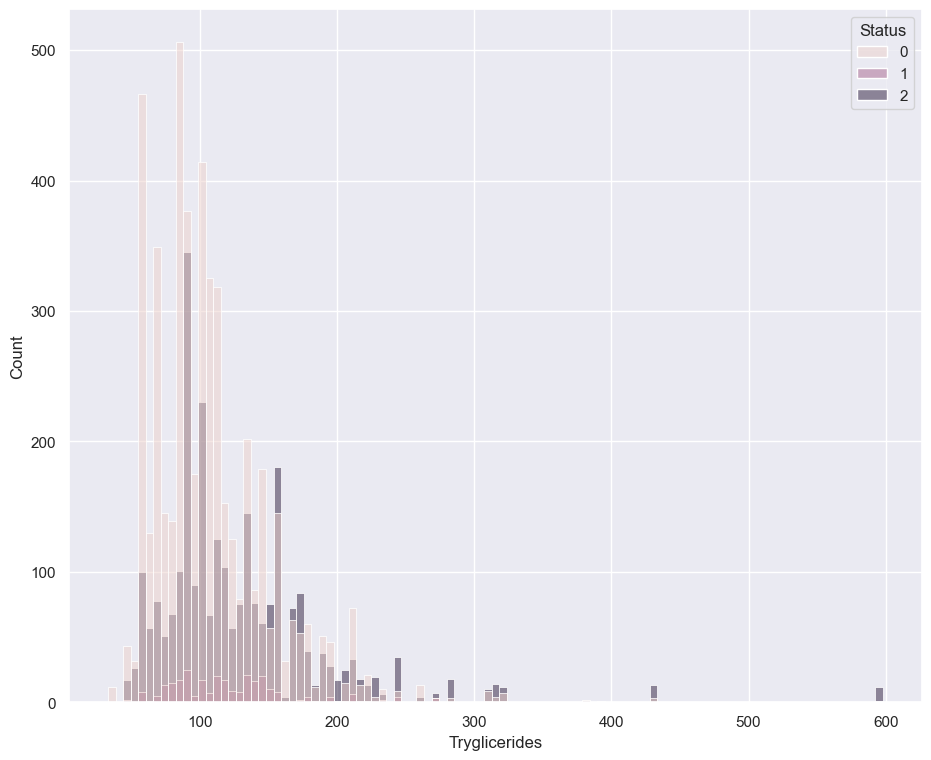

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


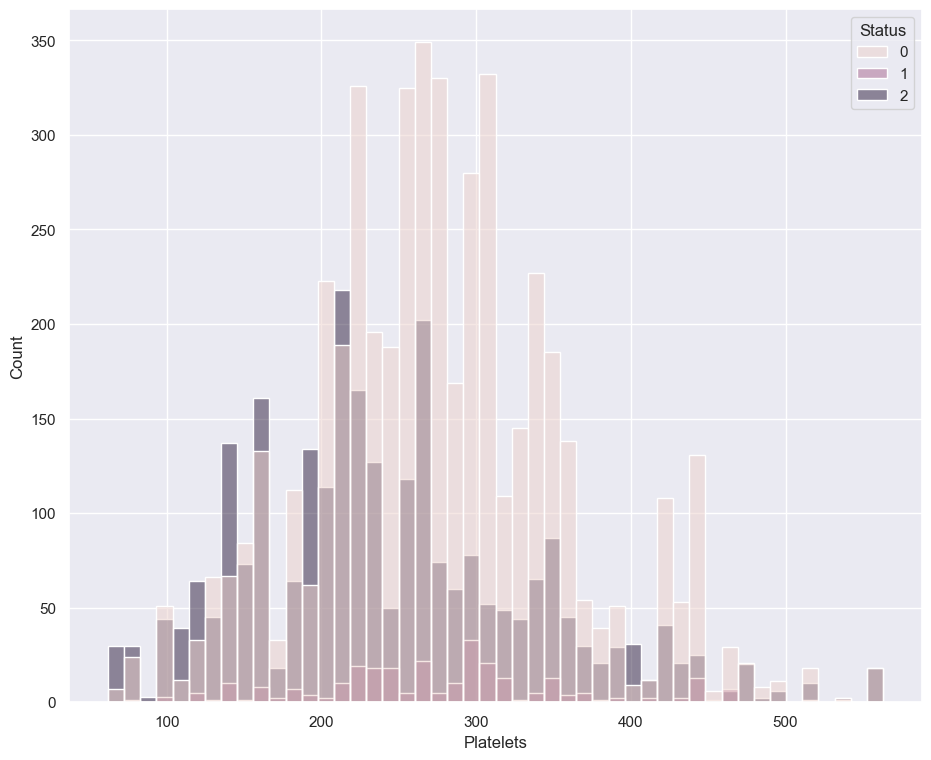

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


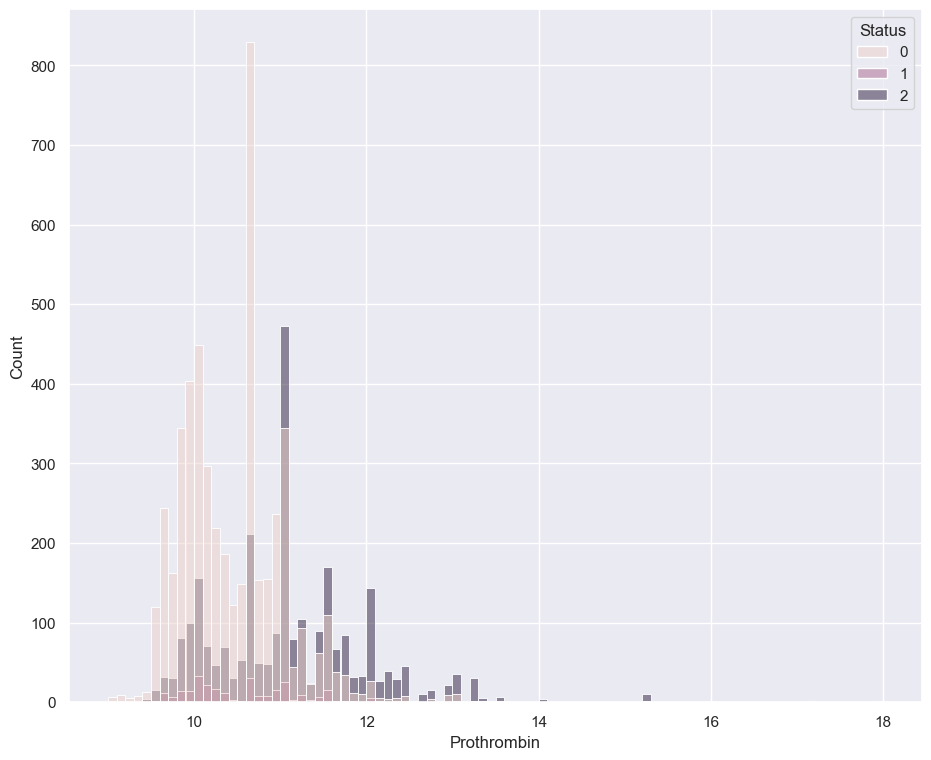

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


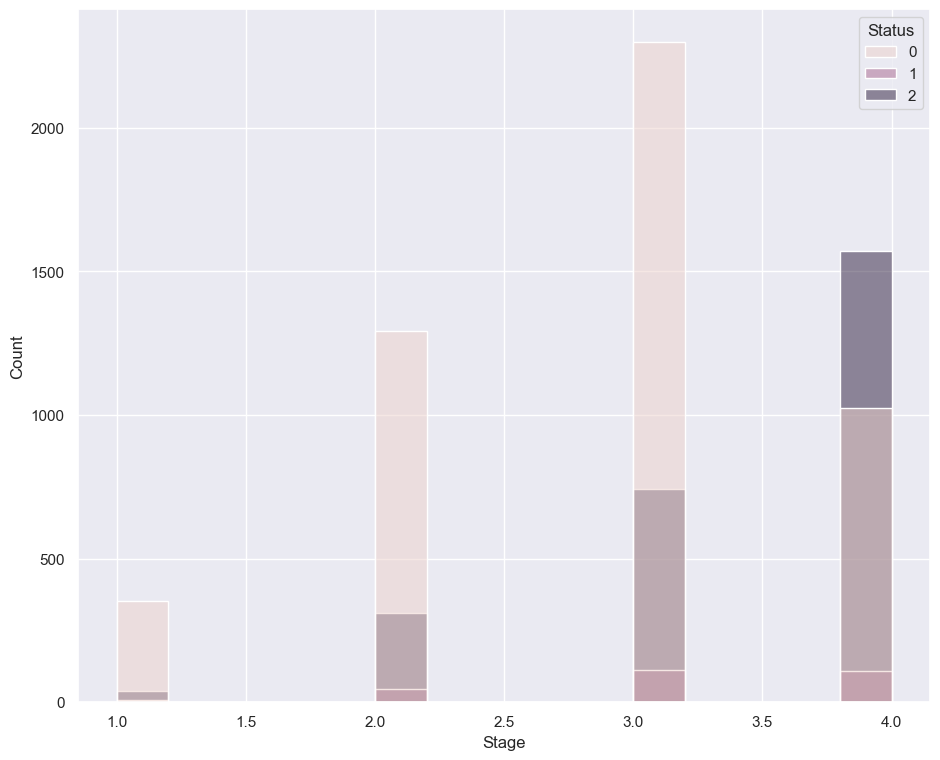

C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\taeud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


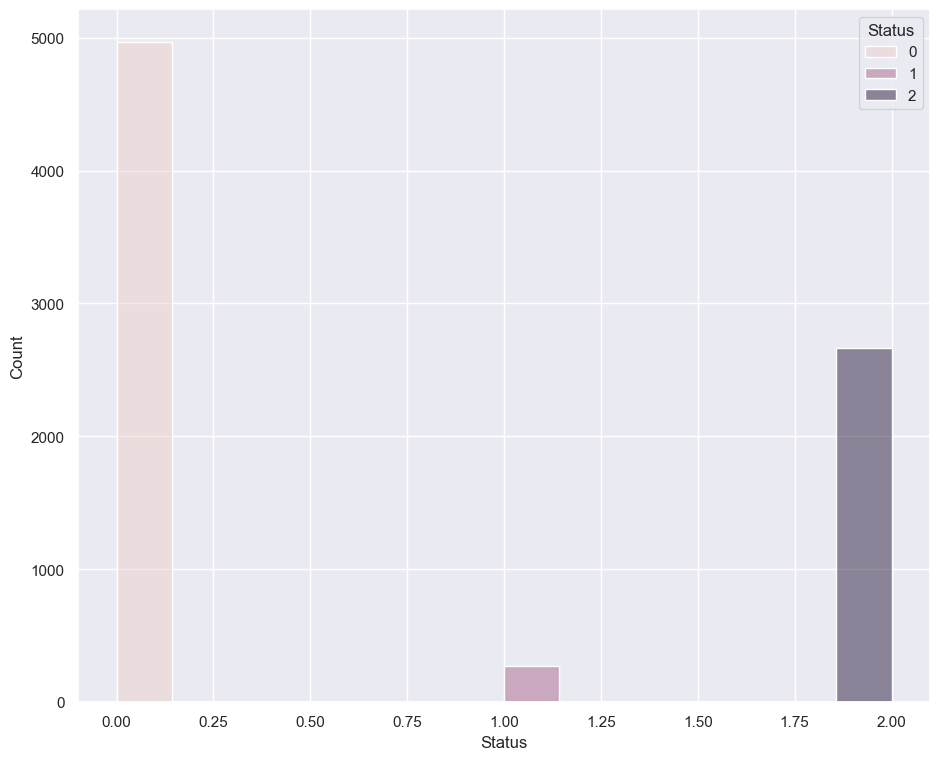

In [90]:
status_colors = {'category1': 'blue', 'category2': 'red', 'category3': 'green'}

for i in train.columns:
    sns.histplot( data=train, x=i, hue='Status', color=status_colors)
    plt.show()

# Feature engineering

In [92]:
#Colonnes de symptomes
train['abnormal_Bilirubin'] = (((train['Bilirubin'] < 1.2) & (train['Age'] < 18 * 365)) | ((train['Bilirubin'] < 1) & (train['Age'] >= 18 * 365))).astype(int)

train['cholesterol_normal'] = ((train['Cholesterol'] < 200)).astype(int)
train['cholesterol_borderline'] = ((200 < train['Cholesterol']) & (train['Cholesterol'] <= 240)).astype(int)
train['cholesterol_high'] = ((train['Cholesterol'] >= 240)).astype(int)

train['albumin_normal'] = ((3.4 <= train['Albumin']) & (train['Albumin'] <= 5.4)).astype(int)
train['albumin_lk'] = (train['Albumin'] < 3.4).astype(int)
train['albumin_osc'] = (train['Albumin'] > 5.4).astype(int)

train['Copper_normal'] = ((62 <= train['Copper']) & (train['Copper'] <= 140)).astype(int)
train['copper_kidney'] = (train['Copper'] > 140 ).astype(int)

train['Alk_Phos_normal'] = ((62 <= train['Alk_Phos']) & (train['Alk_Phos'] <= 140)).astype(int)
train['Alk_Phos_bone_liver'] = (train['Alk_Phos'] > 147).astype(int)

train['SGOT_normal'] = ((8 <= train['SGOT']) & (train['SGOT'] <= 45)).astype(int)
train['SGOT_disease'] = (((train['SGOT'] > 50) & (train['Sex'] == 1)) | ((train['SGOT'] > 45) & (train['Sex'] == 0))).astype(int)

train['Tryglicerides'] = (train['Tryglicerides'] < 150).astype(int)
train['Tryglicerides_borderline'] = ((150 <= train['Tryglicerides']) & (train['Tryglicerides'] <= 199)).astype(int)
train['Tryglicerides_high'] = ((200 <= train['Tryglicerides']) & (train['Tryglicerides'] <= 499)).astype(int)
train['Tryglicerides_very_high'] = (train['Tryglicerides'] >= 500).astype(int)

train['Platelets_normal'] = ((150000 <= train['Platelets']) & (train['Platelets'] <= 450000)).astype(int)
train['Platelets_bleeding'] = (train['Platelets'] < 150000).astype(int)

train['Prothrombin_abnormal'] = ((11 < train['Prothrombin'] ) & (train['Prothrombin'] < 13.5)).astype(int)


train['n_symptoms'] = train['abnormal_Bilirubin'] + train['cholesterol_high'] + train['albumin_lk'] + train['albumin_osc'] + train['copper_kidney'] + train['Alk_Phos_bone_liver'] + train['SGOT_disease'] + train['Tryglicerides_high'] + train['Tryglicerides_very_high'] + train['Platelets_bleeding'] + train['Prothrombin_abnormal'] + train['Ascites'].astype(int) + train['Hepatomegaly'].astype(int) + train['Spiders'].astype(int) + train['Edema'].astype(int)
train['n_symptoms_top'] = train['Ascites'].astype(int) + train['Hepatomegaly'].astype(int) + train['Spiders'].astype(int) + train['Edema'].astype(int)
train['n_symptoms_num'] = train['abnormal_Bilirubin'] + train['cholesterol_high'] + train['albumin_lk'] + train['albumin_osc'] + train['copper_kidney'] + train['Alk_Phos_bone_liver'] + train['SGOT_disease'] + train['Tryglicerides_high'] + train['Tryglicerides_very_high'] + train['Platelets_bleeding'] + train['Prothrombin_abnormal']

#Score de santé
train['ALBI_Score'] = 0.66 * np.log10(17.1 * train['Bilirubin']) - (train['Albumin'] * 0.085)

In [95]:
#Classes d'age 
# Use Kmeans or Knn to create groups

bins = [0, 16500, 24000, 29000]
labelAge = ['0_16500','17000_23500', '24000_+']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels=labelAge)
#Transformation de la variable cible
encoder = OneHotEncoder(sparse_output=False)
status_encoded = encoder.fit_transform(train[['AgeGroup']])
encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['AgeGroup']))
train = pd.concat([train, encoded_df], axis=1)


# Create groups for N_Days
bins = [0, 1000, 2700, 5000]
labelDays = ['0_1000','1000_2700', '2700_5000']
train['N_Days_Group'] = pd.cut(train['N_Days'], bins, labels=labelDays)
#Transformation de la variable cible
encoder = OneHotEncoder(sparse_output=False)
status_encoded = encoder.fit_transform(train[['N_Days_Group']])
encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['N_Days_Group']))
train = pd.concat([train, encoded_df], axis=1)


In [96]:
#Classes par Kmeans
from sklearn.cluster import KMeans
X = train['Age'].values.reshape(-1, 1)
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train['Age_Group'] = kmeans.fit_predict(X)
age_group_labels = ['Jeune', 'Moyen', 'Âgé']
train['Age_Group_Label'] = train['Age_Group'].map({i: label for i, label in enumerate(age_group_labels)})
#Transformation de la variable cible -FINIR
encoder = OneHotEncoder(sparse_output=False)
status_encoded = encoder.fit_transform(train[['Age_Group_Label']])
encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['Age_Group_Label']))
train = pd.concat([train, encoded_df], axis=1)

print(train.groupby('Age_Group_Label')['Age'].describe())


C:\Users\taeud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                  count          mean          std      min      25%      50%  \
Age_Group_Label                                                                 
Jeune            3518.0  18995.590961  1248.570787  16658.0  17889.0  19060.0   
Moyen            2629.0  14215.219855  1566.948545   9598.0  12912.0  14558.0   
Âgé              1758.0  23345.518203  1656.578588  21247.0  22336.0  22857.0   

                     75%      max  
Age_Group_Label                    
Jeune            20254.0  21074.0  
Moyen            15574.0  16558.0  
Âgé              24472.0  28650.0  


In [97]:
#Traitement et création de train_x/y
train = train.drop(['AgeGroup','N_Days_Group','Age_Group_Label'], axis=1)
train_x, train_y = train.drop('Status', axis=1), train['Status']

# Jeu de données désequilibré

In [99]:
#Stratégie utilisée: oversampling car jeu de données faible

In [102]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority')
train_x, train_y = oversample.fit_resample(train_x, train_y)

# Recherche des paramètres

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import optuna

def objective(trial):
    params = {
        'objective': 'multi:softprob',  # optimisateur de classifications multimodales
        'num_class': 3,  
        'booster': 'gbtree',
        'eval_metric': 'mlogloss',  # Evaluation Kaggle basée sur le logloss
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)
    loss = log_loss(y_val, y_pred)
    return loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

best_params = study.best_params
print(f"Best Params: {best_params}")

# Echantillon test

In [103]:
object_columns = test.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in object_columns:
    test[col] = label_encoder.fit_transform(test[col])

In [104]:
#Colonnes de symptomes
test['abnormal_Bilirubin'] = (((test['Bilirubin'] < 1.2) & (test['Age'] < 18 * 365)) | ((test['Bilirubin'] < 1) & (test['Age'] >= 18 * 365))).astype(int)

test['cholesterol_normal'] = ((test['Cholesterol'] < 200)).astype(int)
test['cholesterol_borderline'] = ((200 < test['Cholesterol']) & (test['Cholesterol'] <= 240)).astype(int)
test['cholesterol_high'] = ((test['Cholesterol'] >= 240)).astype(int)

test['albumin_normal'] = ((3.4 <= test['Albumin']) & (test['Albumin'] <= 5.4)).astype(int)
test['albumin_lk'] = (test['Albumin'] < 3.4).astype(int)
test['albumin_osc'] = (test['Albumin'] > 5.4).astype(int)

test['Copper_normal'] = ((62 <= test['Copper']) & (test['Copper'] <= 140)).astype(int)
test['copper_kidney'] = (test['Copper'] > 140 ).astype(int)

test['Alk_Phos_normal'] = ((62 <= test['Alk_Phos']) & (test['Alk_Phos'] <= 140)).astype(int)
test['Alk_Phos_bone_liver'] = (test['Alk_Phos'] > 147).astype(int)

test['SGOT_normal'] = ((8 <= test['SGOT']) & (test['SGOT'] <= 45)).astype(int)
test['SGOT_disease'] = (((test['SGOT'] > 50) & (test['Sex'] == 1)) | ((test['SGOT'] > 45) & (test['Sex'] == 0))).astype(int)

test['Tryglicerides'] = (test['Tryglicerides'] < 150).astype(int)
test['Tryglicerides_borderline'] = ((150 <= test['Tryglicerides']) & (test['Tryglicerides'] <= 199)).astype(int)
test['Tryglicerides_high'] = ((200 <= test['Tryglicerides']) & (test['Tryglicerides'] <= 499)).astype(int)
test['Tryglicerides_very_high'] = (test['Tryglicerides'] >= 500).astype(int)

test['Platelets_normal'] = ((150000 <= test['Platelets']) & (test['Platelets'] <= 450000)).astype(int)
test['Platelets_bleeding'] = (test['Platelets'] < 150000).astype(int)

test['Prothrombin_abnormal'] = ((11 < test['Prothrombin'] ) & (test['Prothrombin'] < 13.5)).astype(int)


test['n_symptoms'] = test['abnormal_Bilirubin'] + test['cholesterol_high'] + test['albumin_lk'] + test['albumin_osc'] + test['copper_kidney'] + test['Alk_Phos_bone_liver'] + test['SGOT_disease'] + test['Tryglicerides_high'] + test['Tryglicerides_very_high'] + test['Platelets_bleeding'] + test['Prothrombin_abnormal'] + test['Ascites'].astype(int) + test['Hepatomegaly'].astype(int) + test['Spiders'].astype(int) + test['Edema'].astype(int)
test['n_symptoms_top'] = test['Ascites'].astype(int) + test['Hepatomegaly'].astype(int) + test['Spiders'].astype(int) + test['Edema'].astype(int)
test['n_symptoms_num'] = test['abnormal_Bilirubin'] + test['cholesterol_high'] + test['albumin_lk'] + test['albumin_osc'] + test['copper_kidney'] + test['Alk_Phos_bone_liver'] + test['SGOT_disease'] + test['Tryglicerides_high'] + test['Tryglicerides_very_high'] + test['Platelets_bleeding'] + test['Prothrombin_abnormal']


In [105]:
#Score de santé
test['ALBI_Score'] = 0.66 * np.log10(17.1 * test['Bilirubin']) - (test['Albumin'] * 0.085)
#Classes d'age 
# Use Kmeans or Knn to create groups

bins = [0, 16500, 24000, 29000]
labelAge = ['0_16500','17000_23500', '24000_+']
test['AgeGroup'] = pd.cut(test['Age'], bins, labels=labelAge)

#Transformation de la variable cible
encoder = OneHotEncoder(sparse_output=False)
status_encoded = encoder.fit_transform(test[['AgeGroup']])
encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['AgeGroup']))
test = pd.concat([test, encoded_df], axis=1)

# Create groups for N_Days
bins = [0, 1000, 2700, 5000]
labelDays = ['0_1000','1000_2700', '2700_5000']
test['N_Days_Group'] = pd.cut(test['N_Days'], bins, labels=labelDays)

#Transformation de la variable cible
encoder = OneHotEncoder(sparse_output=False)
status_encoded = encoder.fit_transform(test[['N_Days_Group']])
encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['N_Days_Group']))
test = pd.concat([test, encoded_df], axis=1)

In [106]:
bins = [0, 16558.0, 21074.0, 29000]
labelDays = ['Moyen','Jeune', 'Âgé']
test['Age_Group_Label'] = pd.cut(test['Age'], bins, labels=labelDays)
#train['Age_Group_Label'] = train['Age_Group'].map({i: label for i, label in enumerate(age_group_labels)})

#Transformation de la variable cible
encoder = OneHotEncoder(sparse_output=False)
status_encoded = encoder.fit_transform(test[['Age_Group_Label']])
encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['Age_Group_Label']))
test = pd.concat([test, encoded_df], axis=1)

test = test.drop(['AgeGroup','N_Days_Group','Age_Group_Label'], axis=1) 
train_x = train_x.drop(['Age_Group'], axis=1) 


In [107]:
#Prediction
print(test.columns.difference(train_x.columns)) #OneHotencoder train & test, one hot encoder NDays test
print(train_x.columns.difference(test.columns))

Index([], dtype='object')
Index([], dtype='object')


In [139]:
meill_param2 = {'learning_rate': 0.01,
               'max_depth': 5,
               'n_estimators': 100}

meill_param = {'max_depth': 9, 'learning_rate': 0.09942876365220821, 'subsample': 0.7090651099164327, 'colsample_bytree': 0.5944947777713214, 'min_child_weight': 6}

In [140]:
import xgboost as xgb
best_model = xgb.XGBClassifier(**meill_param)

In [148]:
best_model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5944947777713214, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09942876365220821,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

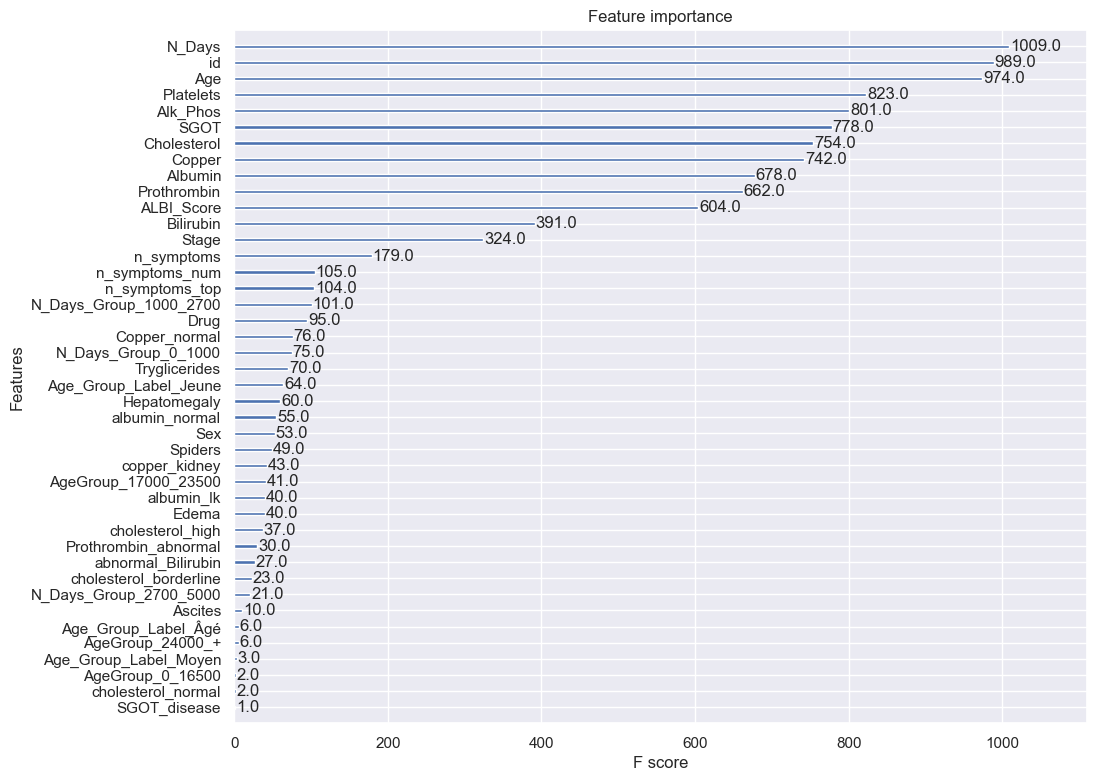

In [153]:
from matplotlib import pyplot
xgb.plot_importance(model)
pyplot.show()

In [142]:
test_pred = best_model.predict_proba(test)

In [143]:

submission_df = pd.DataFrame(test_pred, columns=['Status_C', 'Status_CL', 'Status_D'])
submission_df['id'] = test['id'].values 

In [144]:
submission_df = submission_df[['id', 'Status_C', 'Status_CL', 'Status_D']]

In [145]:
submission_df.to_csv('submission.csv', index=False)
#Pas d'output; Colonne 